In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as ex

import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats as stats
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")


In [64]:
applic = pd.read_csv("./data/data/applicant.csv")


In [65]:
applic.shape

(1000, 15)

In [66]:
applic.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [67]:
applic['applicant_id'].value_counts().shape

(1000,)

In [68]:
loan=pd.read_csv("./data/data/loan.csv")

In [69]:
loan.shape

(1000, 13)

In [70]:
loan.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [71]:
loan['applicant_id'].value_counts()

1469590    1
1554792    1
1439887    1
1237671    1
1352279    1
          ..
1507864    1
1191977    1
1572898    1
1193436    1
1660770    1
Name: applicant_id, Length: 1000, dtype: int64

In [72]:
merged_data = loan.merge(applic,on=["applicant_id"])

In [73]:
merged_data.shape

(1000, 27)

In [74]:
merged_data.columns

Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)'],
      dtype='object')

In [75]:
column_names = ['loan_application_id', 'applicant_id', 'Months_loan_taken_for','Purpose', 'Principal_loan_amount','EMI_rate_in_percentage_of_disposable_income', 'Property','Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans','Number_of_existing_loans_at_this_bank', 'Loan_history','Primary_applicant_age_in_years', 'Gender','Marital_status', 'Number_of_dependents', 'Housing','Years_at_current_residence', 'Employment_status','Has_been_employed_for_at_least', 'Has_been_employed_for_at_most','Telephone', 'Foreign_worker','Savings_account_balance','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)','high_risk_applicant']

In [76]:
merged_data = merged_data.reindex(columns=column_names)

In [77]:
merged_data.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0,1


In [78]:
pd.set_option('display.max_columns', None)    #setting number of column to be showed when pd function head() is executed

In [79]:
merged_data.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0,1


In [80]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   loan_application_id                                       1000 non-null   object
 1   applicant_id                                              1000 non-null   int64 
 2   Months_loan_taken_for                                     1000 non-null   int64 
 3   Purpose                                                   988 non-null    object
 4   Principal_loan_amount                                     1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income               1000 non-null   int64 
 6   Property                                                  846 non-null    object
 7   Has_coapplicant                                           1000 non-null   int64 
 8   Has_guarantor                

In [81]:
merged_data.isnull().sum()

loan_application_id                                           0
applicant_id                                                  0
Months_loan_taken_for                                         0
Purpose                                                      12
Principal_loan_amount                                         0
EMI_rate_in_percentage_of_disposable_income                   0
Property                                                    154
Has_coapplicant                                               0
Has_guarantor                                                 0
Other_EMI_plans                                             814
Number_of_existing_loans_at_this_bank                         0
Loan_history                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                    

In [82]:
d=merged_data.dtypes
print(type(d.items()))

<class 'zip'>


In [83]:
numerical=[]
categorical=[]
for i,v in d.items():
    if v == 'int64':
       numerical.append(i)
    else :
       categorical.append(i)
    

In [84]:
print(numerical)

['applicant_id', 'Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank', 'Primary_applicant_age_in_years', 'Number_of_dependents', 'Years_at_current_residence', 'Foreign_worker', 'high_risk_applicant']


In [85]:
print(categorical)

['loan_application_id', 'Purpose', 'Property', 'Other_EMI_plans', 'Loan_history', 'Gender', 'Marital_status', 'Housing', 'Employment_status', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Telephone', 'Savings_account_balance', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)', 'Balance_in_existing_bank_account_(upper_limit_of_bucket)']


# Method followed:

    1. Descriptive analysis of all the features to be done i.e both the numerical and categorical.
    2. At first analysis of numerical category feature is done i.e between numerical vs numerical
    3. Then analysis is done between the categorical feature.
<br>In order to show association between two categorical variable we can use a contigency table. The contingency table is a    display for two categorical variables. Its rows list the categories of one variable and its columns list the categories of the other variable. Each entry in the table is the number of observations in the sample at a particular combination of categories of the two categorical variables.</br>

    4. Then analysis is done between response variable(Target variable) and categorical variable
    5. Finally between response variable(Target variable) and numerical variable is done

<b>Descriptive Summaries of Quantitive Variables

In [86]:
#merged_data.describe()

In [87]:
def descriptive_summary_n(column):
    fig, axs = plt.subplots(1,2, figsize=(19,6))
    axs[0].hist(merged_data[column]) #creating histogram plot
    axs[0].axvline(merged_data[column].mean(), color='red', label=f"Mean: {round(merged_data[column].mean(),2)}") #vertical line for mean of the distribution
    axs[0].axvline(merged_data[column].median(), color='green', label=f"Median: {round(merged_data[column].median(),2)}") #vertical line for median of the distribution
    axs[0].axvline(x=merged_data[column].describe()[4],color='r', linestyle='--', label=f"25th percentile: {merged_data[column].describe()[4]}") #vertical line for 25th percentile of the distribution
    axs[0].axvline(x=merged_data[column].describe()[6],color='r', linestyle='--', label=f"75th percentile: {merged_data[column].describe()[6]}") #vertical line for 75th percentile of the distribution
    axs[0].legend()
    sns.boxplot(data=merged_data, x=column, ax=axs[1]) #creating boxplot
    axs[1].axvline(merged_data[column].mean(), color='red') #vertical line for the mean of the distribution
    fig.suptitle(f"Histogram and Boxplot of {column}")
    plt.show()
    print(f"{merged_data[column].describe().round(3)}\n")
    print(f"Range: {merged_data[column].max() - merged_data[column].min()}")
    print(f"Interquartile Range: {merged_data[column].describe()[6] - merged_data[column].describe()[4]}\n")
    print(f"Skewness: {skew(merged_data[merged_data[column].isna()==False][column], bias=True)}")
    print(f"Kurtosis: {kurtosis(merged_data[merged_data[column].isna()==False][column], bias=True)}")


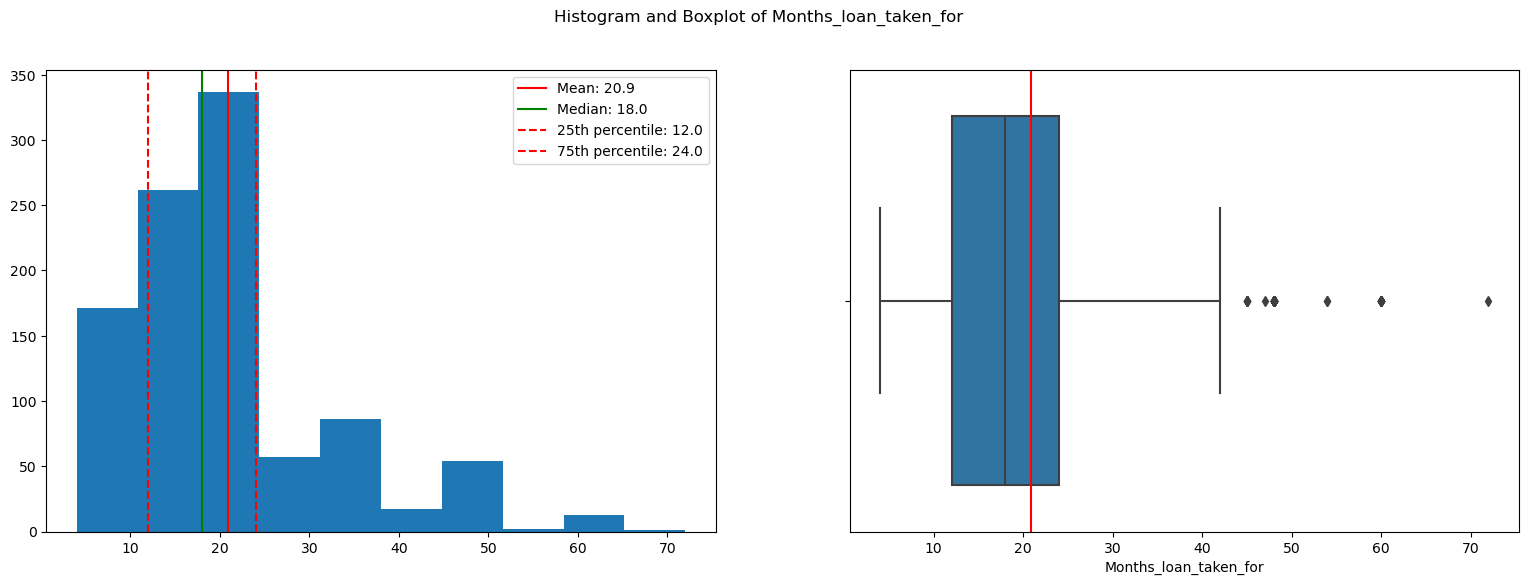

count    1000.000
mean       20.903
std        12.059
min         4.000
25%        12.000
50%        18.000
75%        24.000
max        72.000
Name: Months_loan_taken_for, dtype: float64

Range: 68
Interquartile Range: 12.0

Skewness: 1.0925422109540106
Kurtosis: 0.9091948811374047


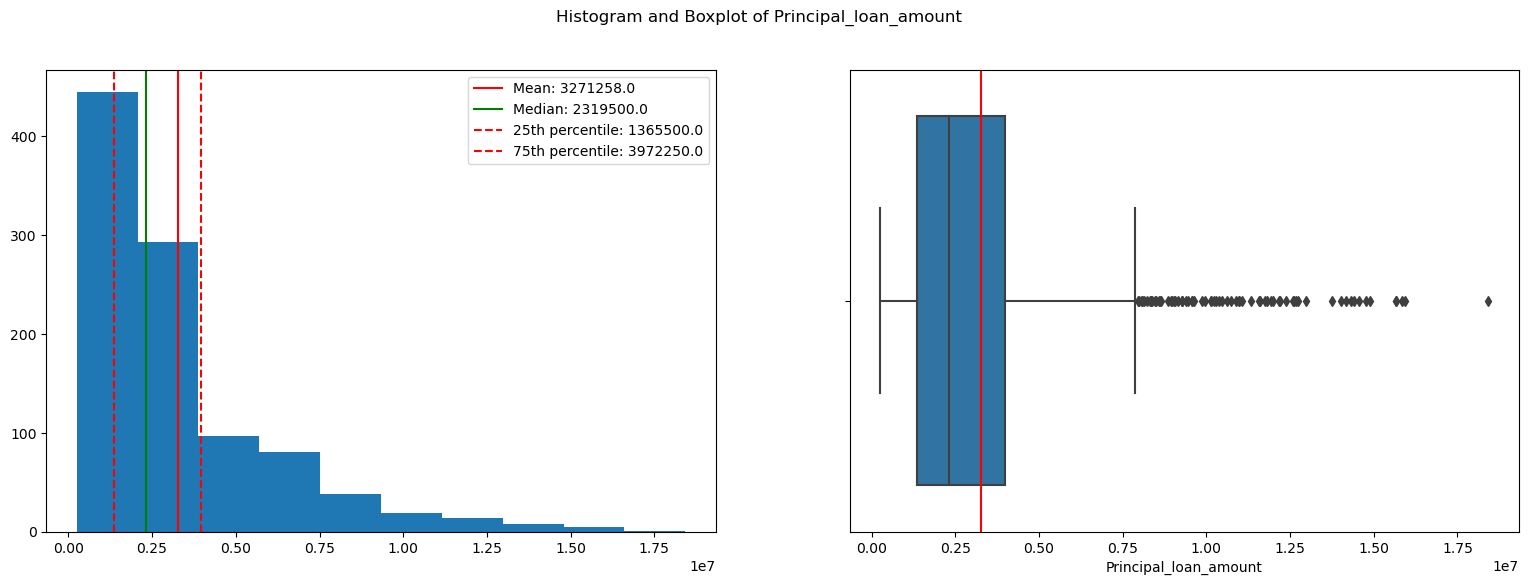

count    1.000000e+03
mean     3.271258e+06
std      2.822737e+06
min      2.500000e+05
25%      1.365500e+06
50%      2.319500e+06
75%      3.972250e+06
max      1.842400e+07
Name: Principal_loan_amount, dtype: float64

Range: 18174000
Interquartile Range: 2606750.0

Skewness: 1.9467020189419237
Kurtosis: 4.265163377213492


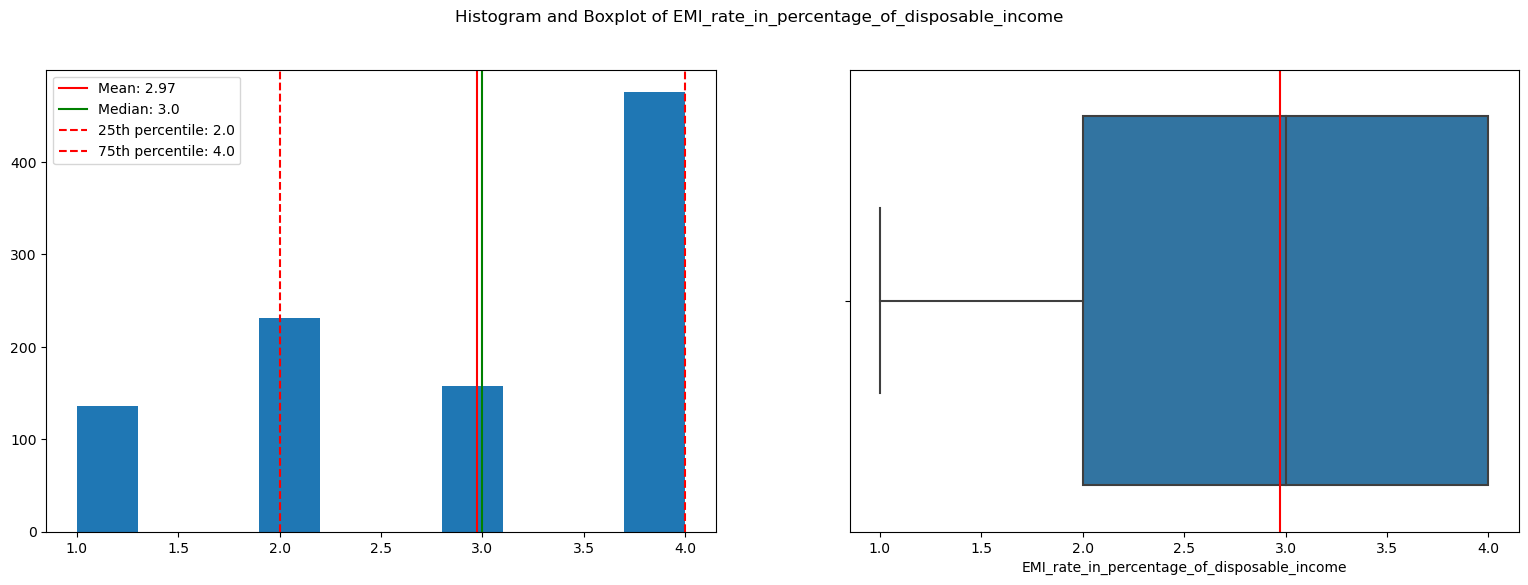

count    1000.000
mean        2.973
std         1.119
min         1.000
25%         2.000
50%         3.000
75%         4.000
max         4.000
Name: EMI_rate_in_percentage_of_disposable_income, dtype: float64

Range: 3
Interquartile Range: 2.0

Skewness: -0.5305507598158565
Kurtosis: -1.2104232256102134


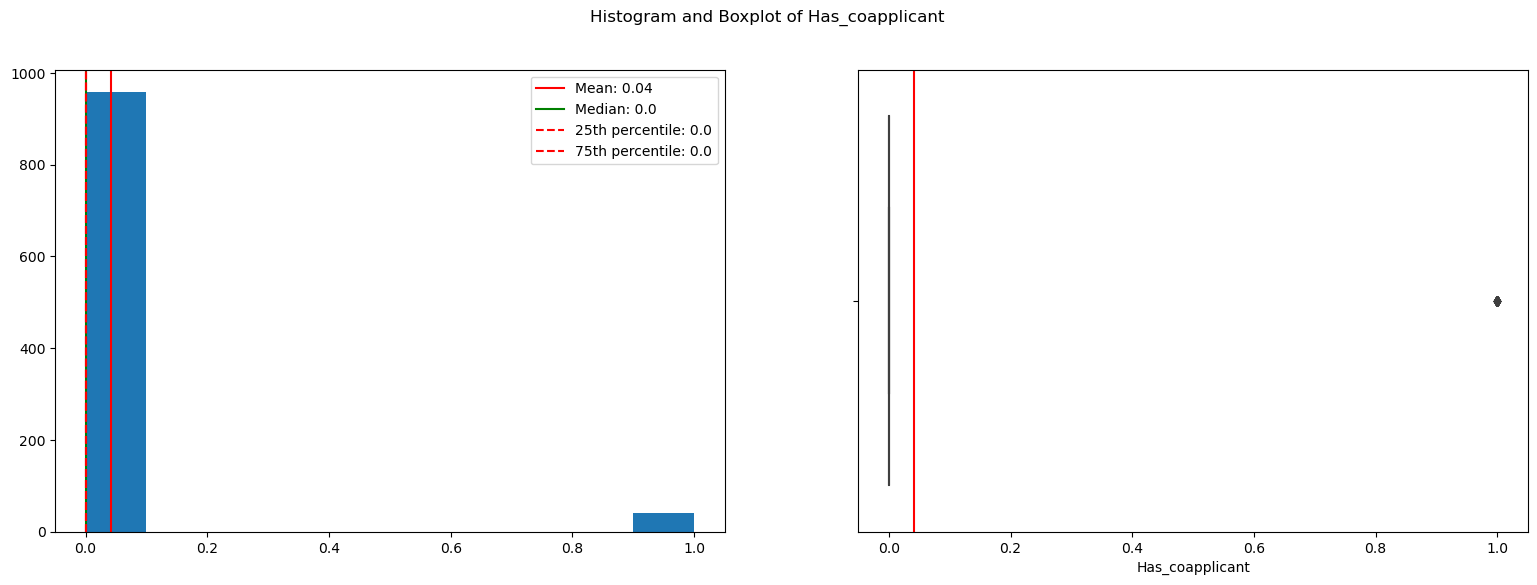

count    1000.000
mean        0.041
std         0.198
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: Has_coapplicant, dtype: float64

Range: 1
Interquartile Range: 0.0

Skewness: 4.629578465693114
Kurtosis: 19.432996770009407


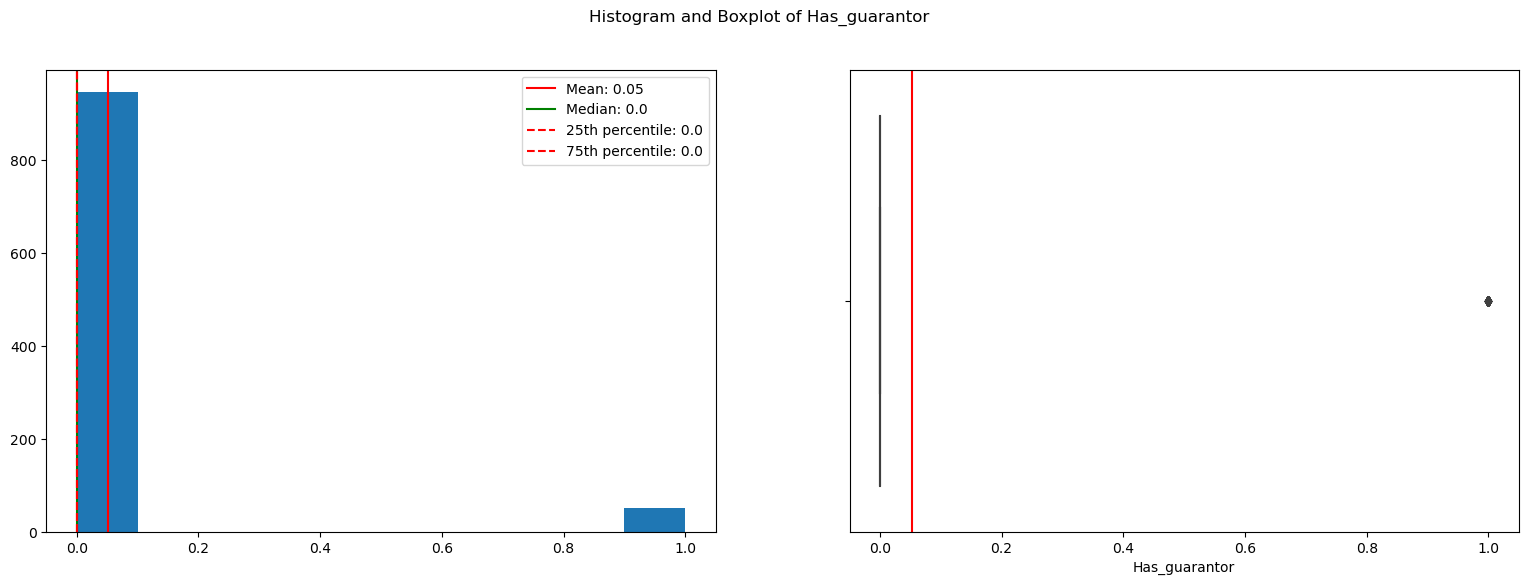

count    1000.000
mean        0.052
std         0.222
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: Has_guarantor, dtype: float64

Range: 1
Interquartile Range: 0.0

Skewness: 4.035544765139438
Kurtosis: 14.285621551444326


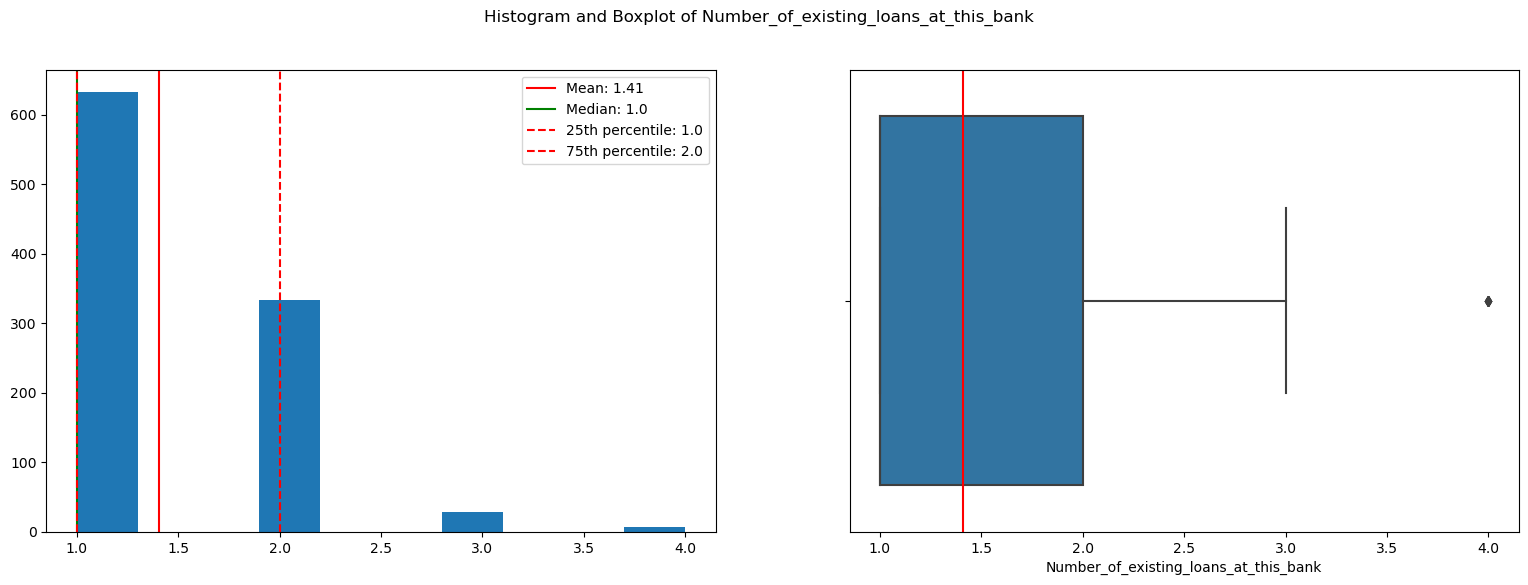

count    1000.000
mean        1.407
std         0.578
min         1.000
25%         1.000
50%         1.000
75%         2.000
max         4.000
Name: Number_of_existing_loans_at_this_bank, dtype: float64

Range: 3
Interquartile Range: 1.0

Skewness: 1.2706663071344104
Kurtosis: 1.59043439263285


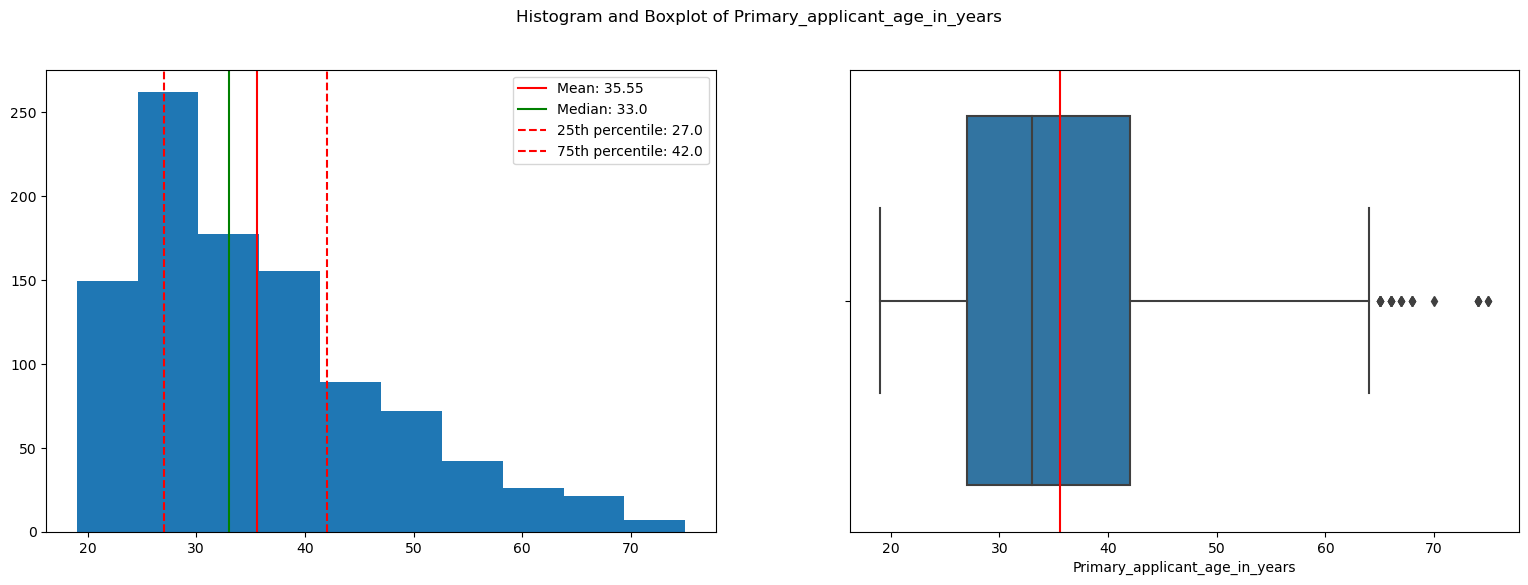

count    1000.000
mean       35.546
std        11.375
min        19.000
25%        27.000
50%        33.000
75%        42.000
max        75.000
Name: Primary_applicant_age_in_years, dtype: float64

Range: 56
Interquartile Range: 15.0

Skewness: 1.019207521364841
Kurtosis: 0.5868108307295379


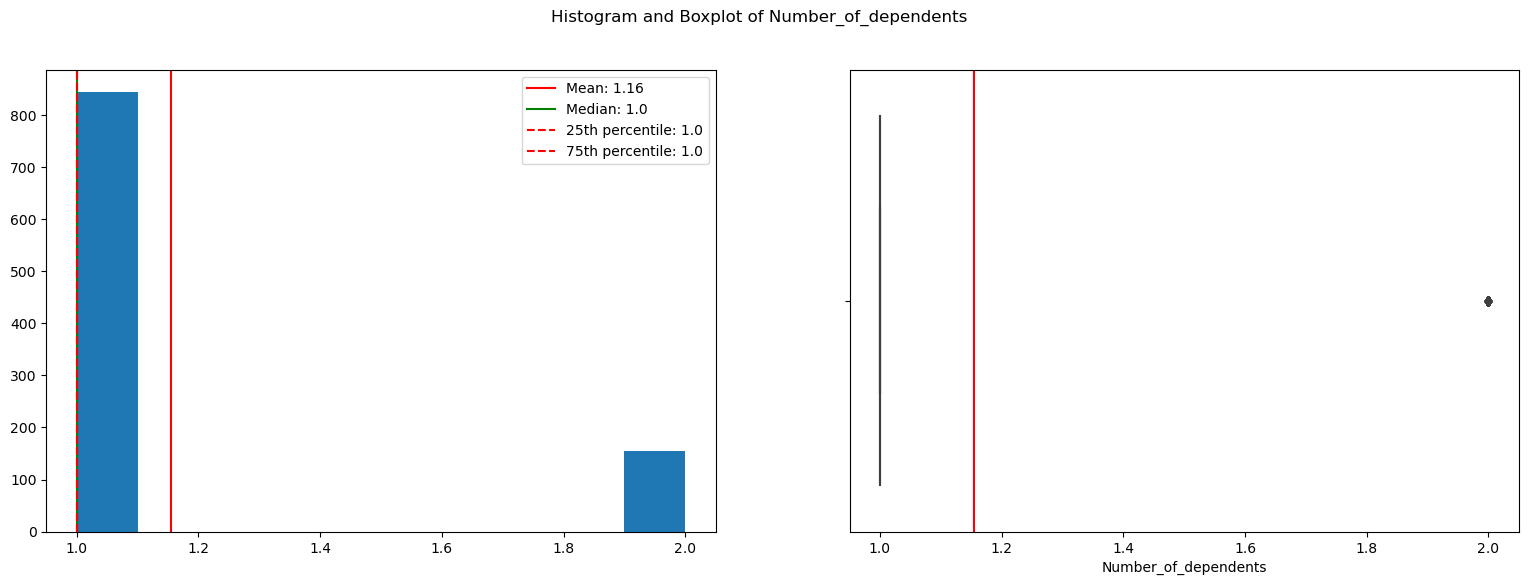

count    1000.000
mean        1.155
std         0.362
min         1.000
25%         1.000
50%         1.000
75%         1.000
max         2.000
Name: Number_of_dependents, dtype: float64

Range: 1
Interquartile Range: 0.0

Skewness: 1.9065793599765346
Kurtosis: 1.6350448558885295


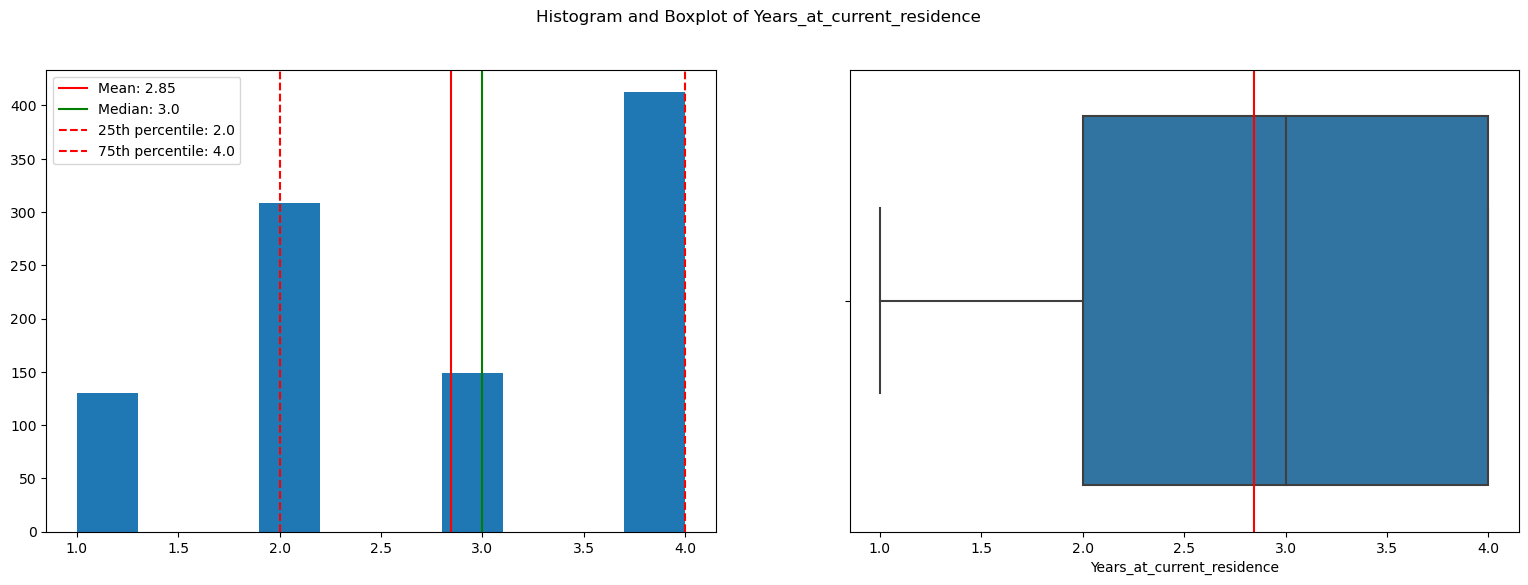

count    1000.000
mean        2.845
std         1.104
min         1.000
25%         2.000
50%         3.000
75%         4.000
max         4.000
Name: Years_at_current_residence, dtype: float64

Range: 3
Interquartile Range: 2.0

Skewness: -0.27216078883719325
Kurtosis: -1.3805449294715695


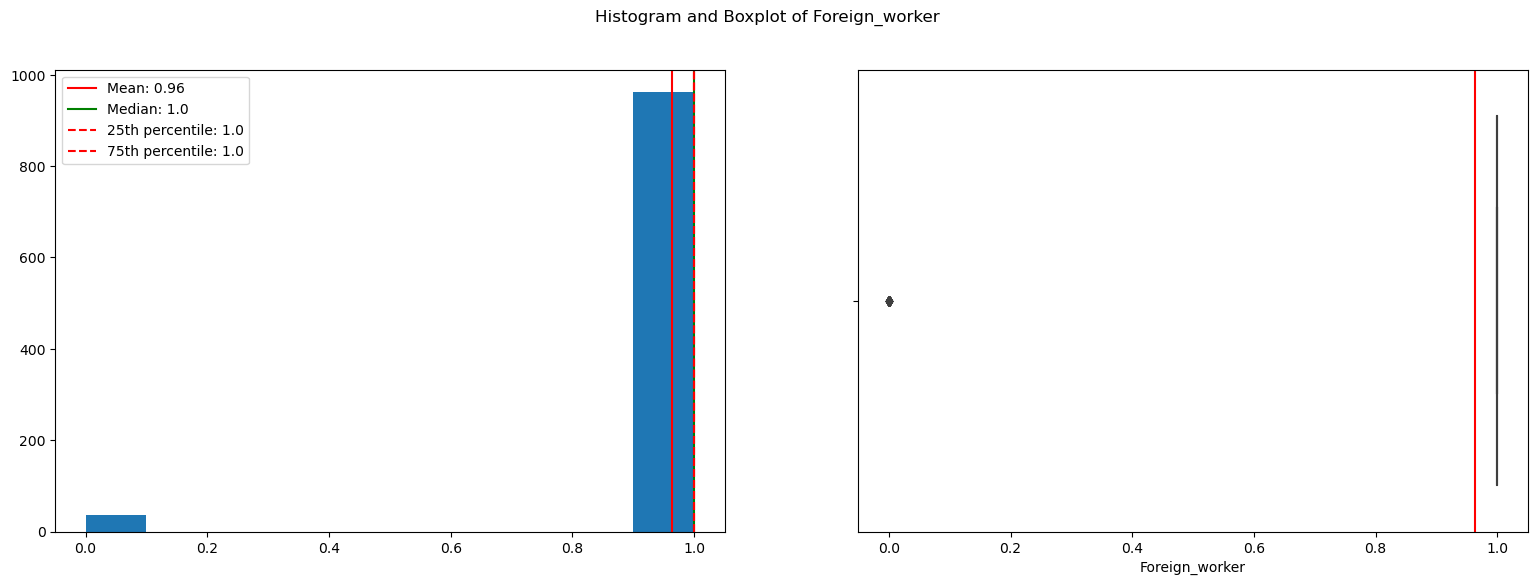

count    1000.000
mean        0.963
std         0.189
min         0.000
25%         1.000
50%         1.000
75%         1.000
max         1.000
Name: Foreign_worker, dtype: float64

Range: 1
Interquartile Range: 0.0

Skewness: -4.905654760192192
Kurtosis: 22.065448626196297


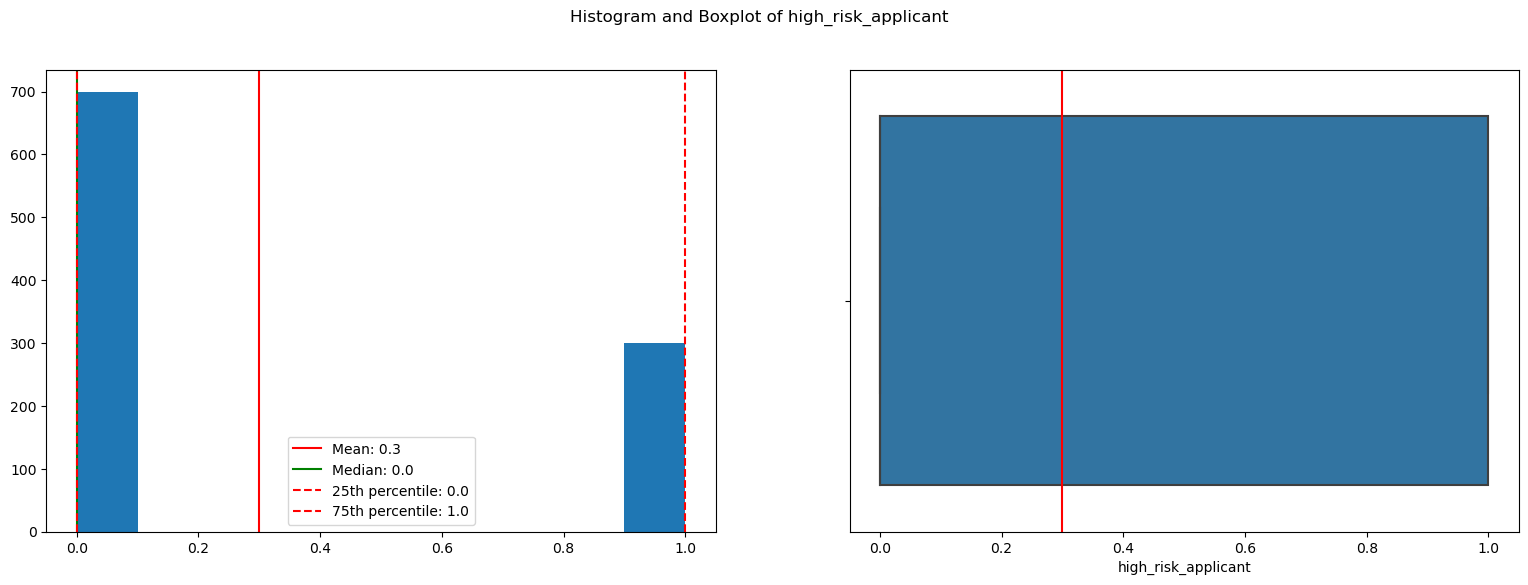

count    1000.000
mean        0.300
std         0.458
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         1.000
Name: high_risk_applicant, dtype: float64

Range: 1
Interquartile Range: 1.0

Skewness: 0.8728715609439699
Kurtosis: -1.2380952380952372


In [88]:
for i in range(1,len(numerical)):
    descriptive_summary_n(numerical[i])

array([[<AxesSubplot:title={'center':'applicant_id'}>,
        <AxesSubplot:title={'center':'Months_loan_taken_for'}>,
        <AxesSubplot:title={'center':'Principal_loan_amount'}>],
       [<AxesSubplot:title={'center':'EMI_rate_in_percentage_of_disposable_income'}>,
        <AxesSubplot:title={'center':'Has_coapplicant'}>,
        <AxesSubplot:title={'center':'Has_guarantor'}>],
       [<AxesSubplot:title={'center':'Number_of_existing_loans_at_this_bank'}>,
        <AxesSubplot:title={'center':'Primary_applicant_age_in_years'}>,
        <AxesSubplot:title={'center':'Number_of_dependents'}>],
       [<AxesSubplot:title={'center':'Years_at_current_residence'}>,
        <AxesSubplot:title={'center':'Foreign_worker'}>,
        <AxesSubplot:title={'center':'high_risk_applicant'}>]],
      dtype=object)

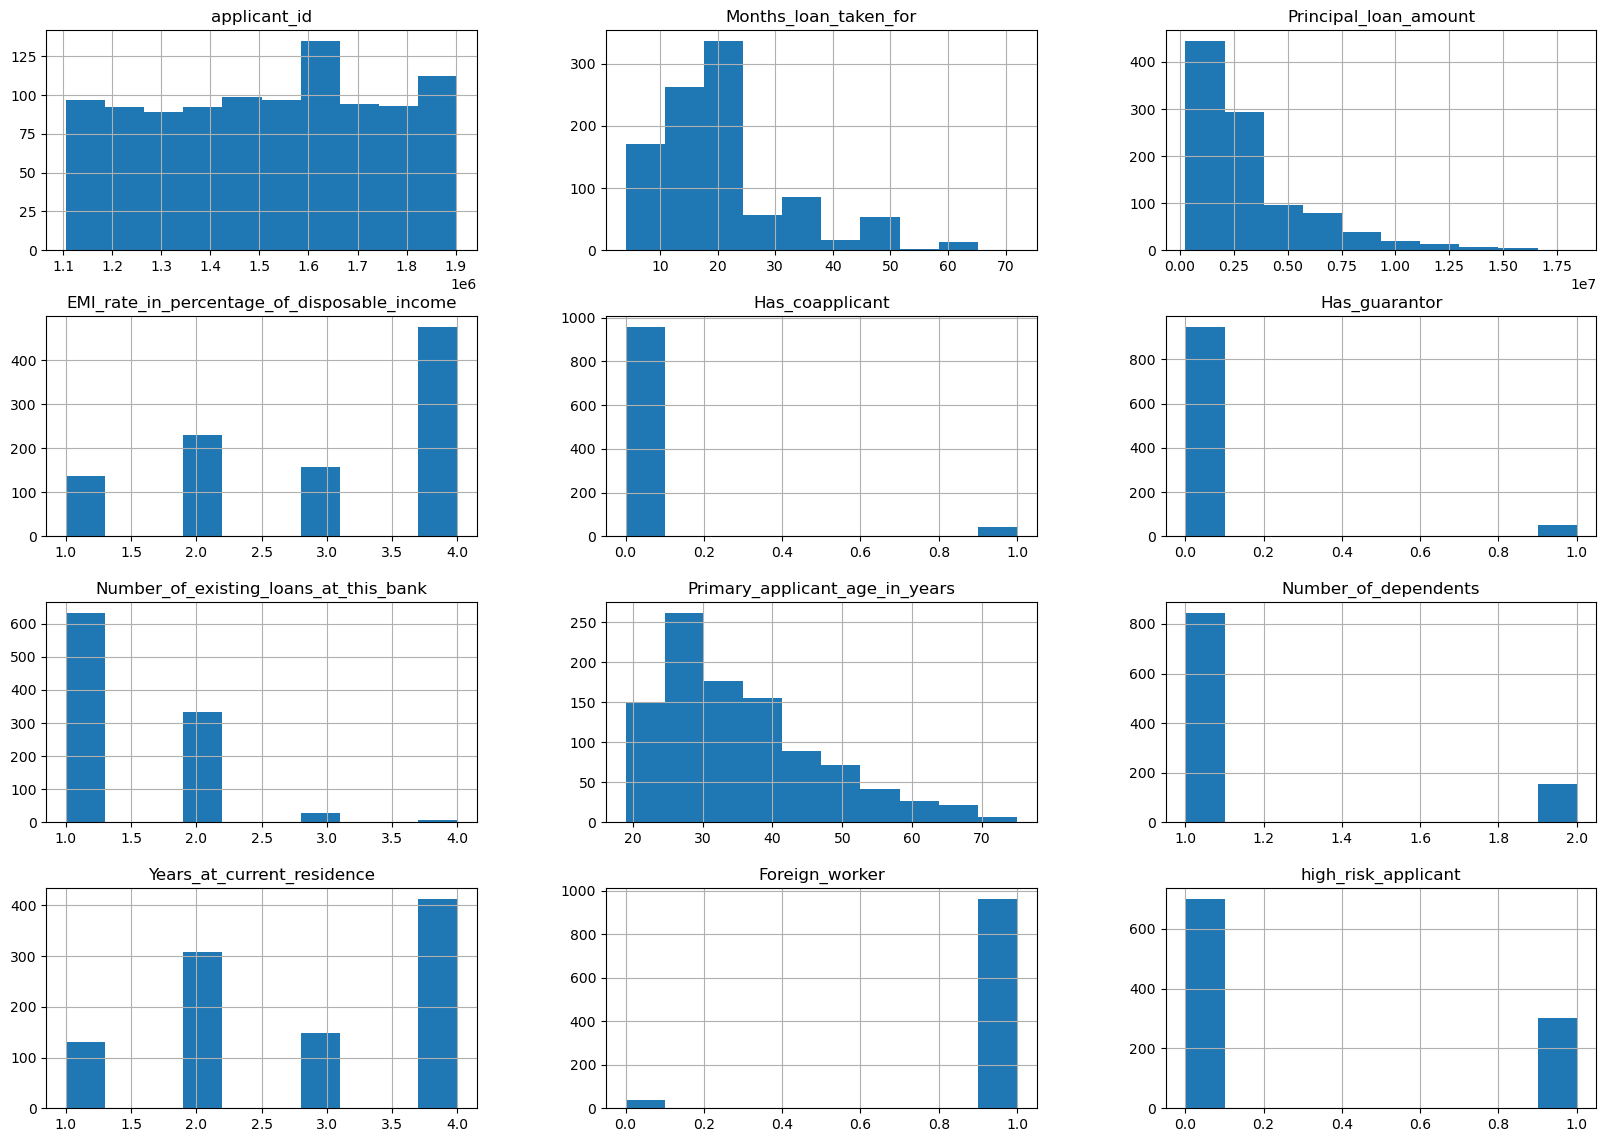

In [89]:
merged_data[numerical].hist(figsize=(20, 14))     # '_'  will automatically remove unnecessary values in this case columns to garbage(only int datatype columns are plotted)

In [90]:
merged_data.describe([0.03,0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90,0.93, 0.95, 0.97,0.99])

,applicant_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,high_risk_applicant
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,35.546000,1.155000,2.845000,0.963000,0.300000
std,2.286764e+05,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,11.375469,0.362086,1.103718,0.188856,0.458487
min,1.105364e+06,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000
3%,1.129722e+06,6.000000,6.387000e+05,1.000000,0.000000,0.000000,1.000000,21.970000,1.000000,1.000000,0.000000,0.000000
5%,1.149540e+06,6.000000,7.089500e+05,1.000000,0.000000,0.000000,1.000000,22.000000,1.000000,1.000000,1.000000,0.000000
10%,1.186988e+06,9.000000,9.320000e+05,1.000000,0.000000,0.000000,1.000000,23.000000,1.000000,1.000000,1.000000,0.000000
25%,1.321398e+06,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,27.000000,1.000000,2.000000,1.000000,0.000000
50%,1.529114e+06,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,33.000000,1.000000,3.000000,1.000000,0.000000
75%,1.707752e+06,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,42.000000,1.000000,4.000000,1.000000,1.000000


<b>Observation:</b>
<br>1. Months_loan_taken_for: 
- majority of the loan taken durations are less than 25 and almost 90 percentage of values present between 4-36 and rest are in between 36-72
- it is positive skewed data .
2. Principal_loan_amount:
- max value is almost 1crore 84 lakhs but the 95 percentage of amount is less than 91 lakhs i.e less than half of max amount
- 32 lakh 71 thousand is the mean loan amount taken
- only roughly 5 % of amt taken are more than 91 lakhs which is low 
3. EMI_rate_in_percentage_of_disposable_income:
- It has a very less spread of values
- almost half of the total applicant have 4 % of disposable income as EMI_rate and 4 % is the max value so all the loan applicants have less than or equal to 4 % of disposable income as EMI_rate
4. Has_coapplicant:
- we can say than less than 95 % of people don't have coapplicants and roughly 3 percentage of the applicants have coapplicants
5. Has_guarantor:
- only 5 % of people have guarateer for the loan which they have applied
6. Number_of_existing_loans_at_this_bank:
- this value ranges from 1-4 
- and 95 % of applicants have less than 2 loans at this bank and 99 % have less than 3 loans at this bank
7. Primary_applicant_age_in_years:
- ranges from 19-75 years of age 
- 50 % of applicants are less than 33 years of age 
- 95 % of applicants are less than 60 yeras of age , implies 5% of applicants are from 60-75 yeras of age 
8. Number_of_dependents:
- all applicants have atleast 1 and atmost 2 dependents
- only 10% of applicants have 2 dependents
9. Years_at_current_residence:
- this value ranges from minimum of 1 to maximum of 4 
- 50 % of the people have stayed in current residence atleast 3 years and 25 % of the people have stayed in 4 years.
10. Foreign_worker:
- more than 95% of people(applicants) are foreign workers.

<b>Descrptive summary of categorical

In [91]:
def descriptive_summary_c(column):
    print(f"\033[1mFrequency table of {column} variable: \033[0m")
    freq_table = merged_data[column].value_counts().to_frame().reset_index() #creating frequency table from counts of each category
    freq_table.columns = [column, 'Frequencies']
    freq_table['% Percentages'] = round(freq_table['Frequencies']/merged_data[column].count()*100,2) #adding percentages
    display(freq_table)
    print()
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    sns.barplot(data=freq_table, x='Frequencies', y=column, palette='flare', ax=axs[0]) #barplot to display frequencies
    colors = sns.color_palette('flare')
    d = list(freq_table['% Percentages'])
    labels = list(freq_table[column])
    plt.pie(d, labels = labels, colors = colors, autopct='%.0f%%') #pie chart to show percentage distribution of each category
    fig.suptitle(f"Bar Chart and Pie Chart of {column} variable")
    plt.show()

Frequency table of Purpose variable: 


,Purpose,Frequencies,% Percentages
0,electronic equipment,280,28.34
1,new vehicle,234,23.68
2,FF&E,181,18.32
3,used vehicle,103,10.43
4,business,97,9.82
5,education,50,5.06
6,repair costs,22,2.23
7,domestic appliances,12,1.21
8,career development,9,0.91


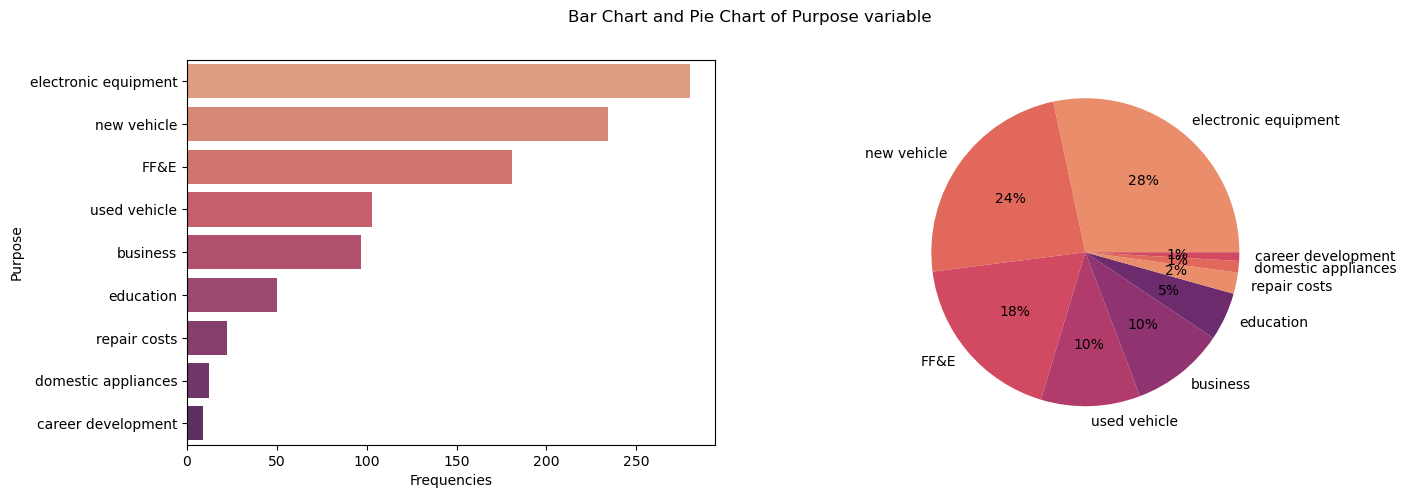

Frequency table of Property variable: 


,Property,Frequencies,% Percentages
0,car or other,332,39.24
1,real estate,282,33.33
2,building society savings agreement/life insurance,232,27.42


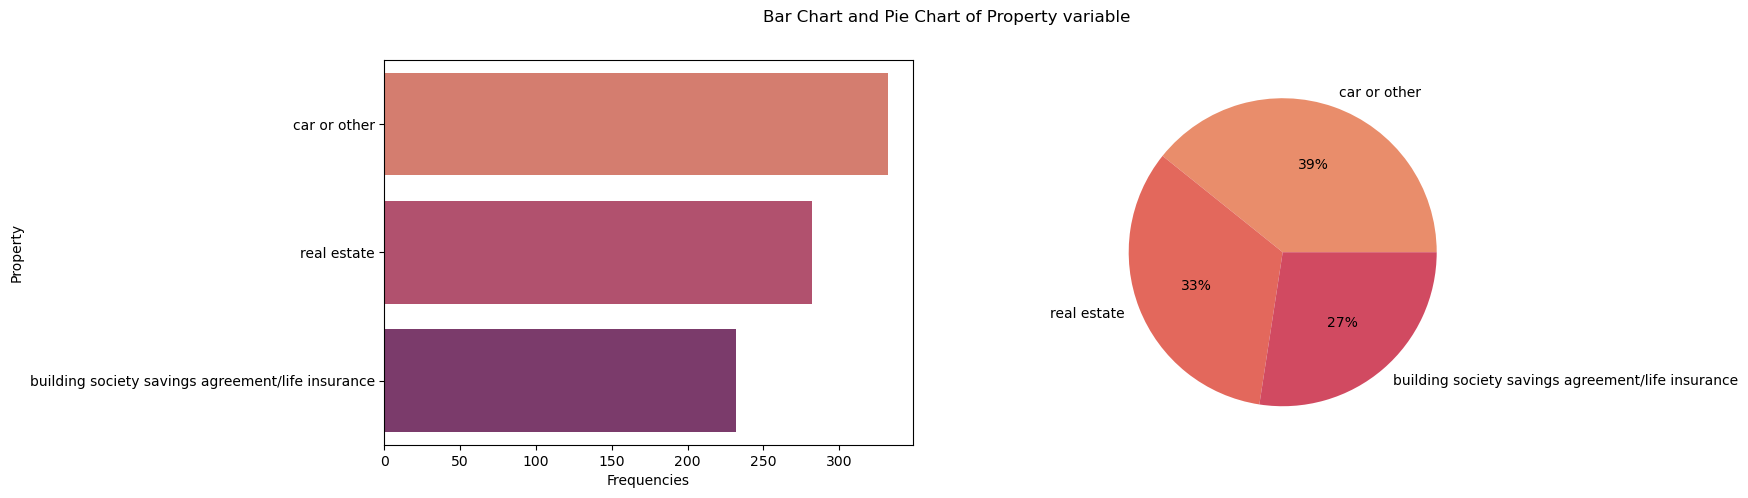

Frequency table of Other_EMI_plans variable: 


,Other_EMI_plans,Frequencies,% Percentages
0,bank,139,74.73
1,stores,47,25.27


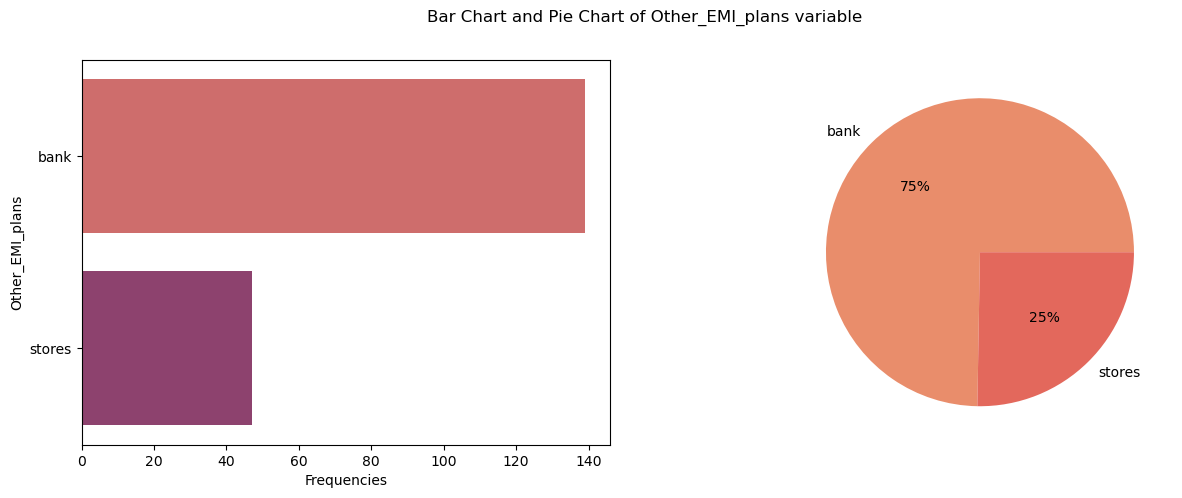

Frequency table of Loan_history variable: 


,Loan_history,Frequencies,% Percentages
0,existing loans paid back duly till now,530,53.0
1,critical/pending loans at other banks,293,29.3
2,delay in paying off loans in the past,88,8.8
3,all loans at this bank paid back duly,49,4.9
4,no loans taken/all loans paid back duly,40,4.0


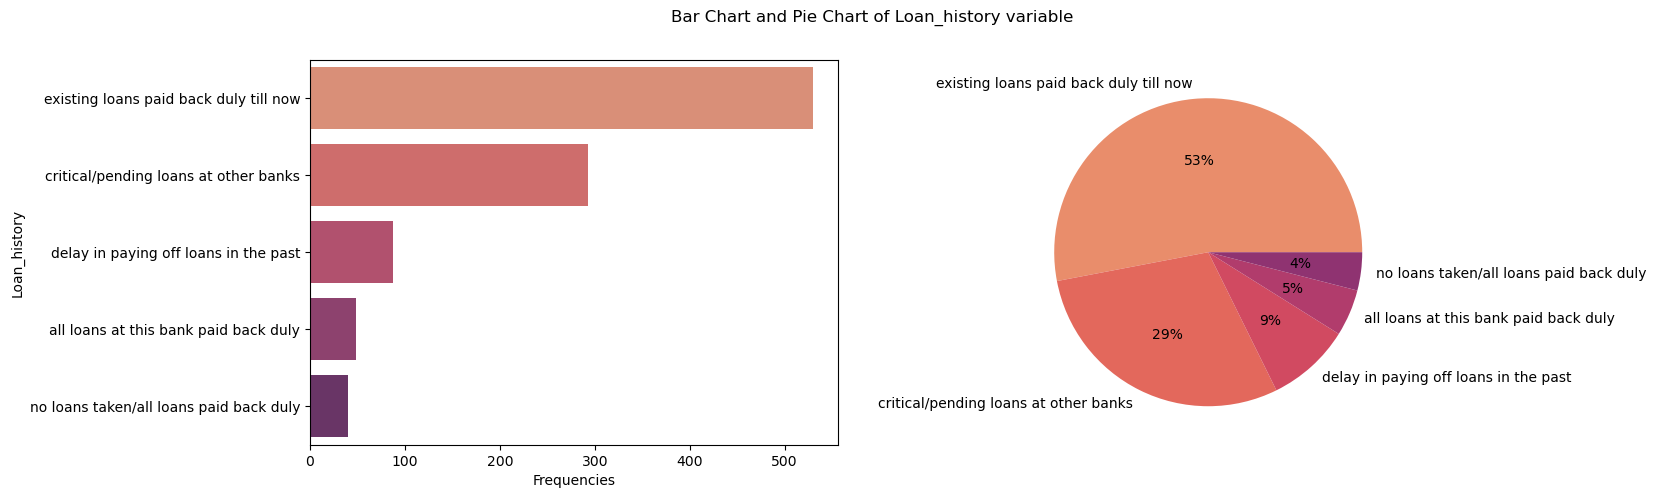

Frequency table of Gender variable: 


,Gender,Frequencies,% Percentages
0,male,690,69.0
1,female,310,31.0


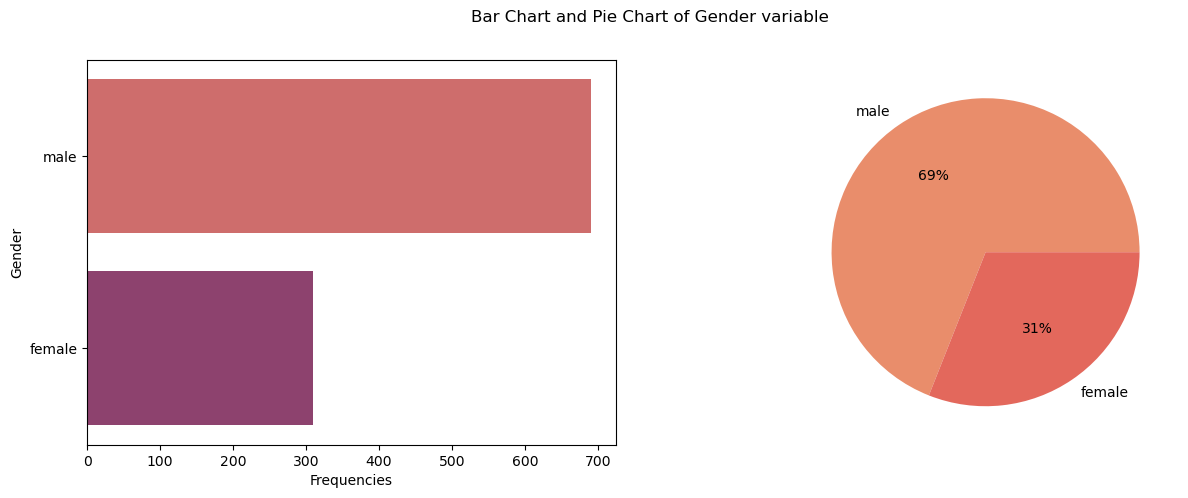

Frequency table of Marital_status variable: 


,Marital_status,Frequencies,% Percentages
0,single,548,54.8
1,divorced/separated/married,310,31.0
2,married/widowed,92,9.2
3,divorced/separated,50,5.0


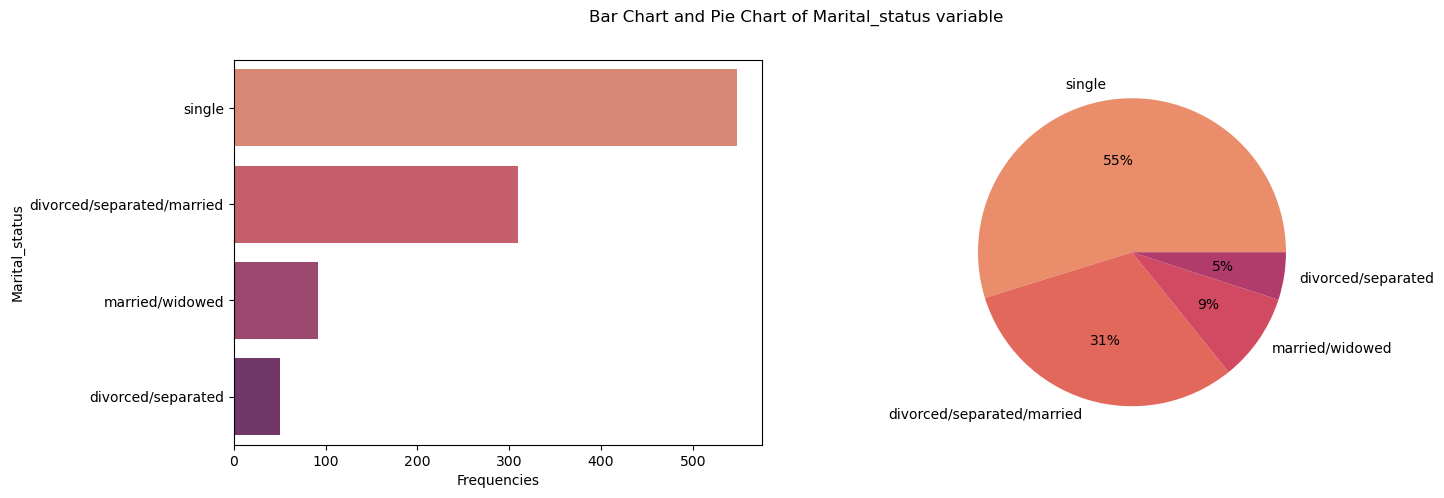

Frequency table of Housing variable: 


,Housing,Frequencies,% Percentages
0,own,713,71.3
1,rent,179,17.9
2,for free,108,10.8


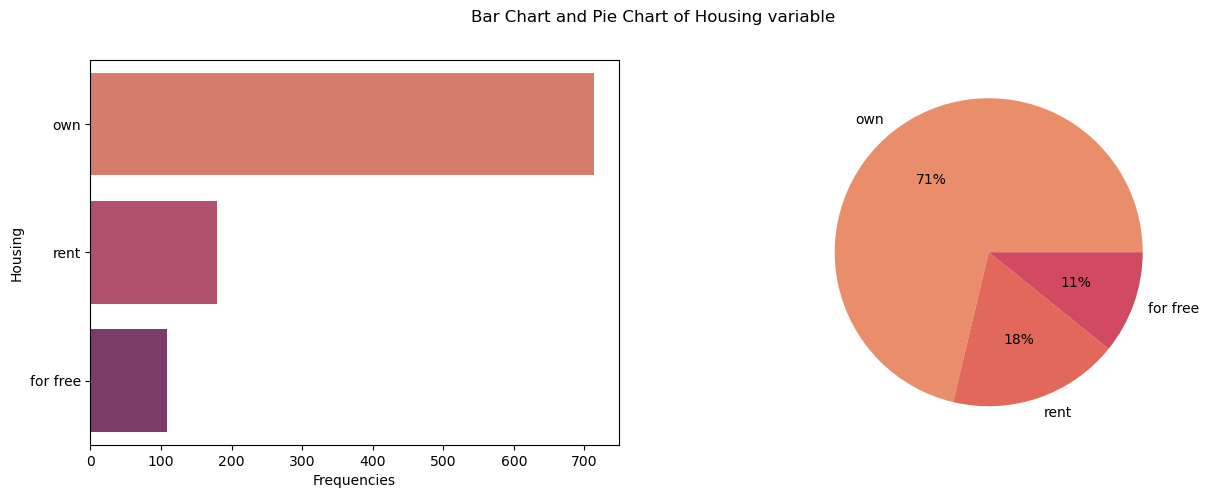

Frequency table of Employment_status variable: 


,Employment_status,Frequencies,% Percentages
0,skilled employee / official,630,63.0
1,unskilled - resident,200,20.0
2,management / self-employed / highly qualified ...,148,14.8
3,unemployed / unskilled - non-resident,22,2.2


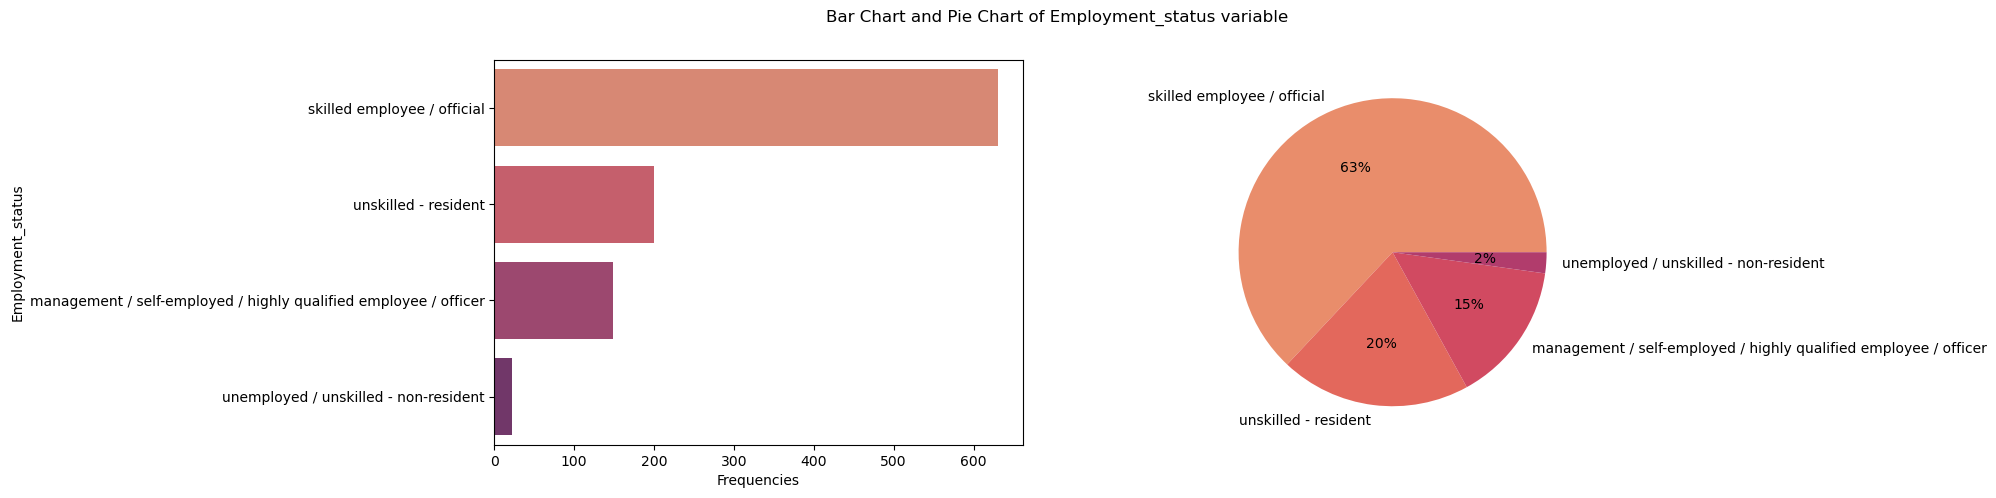

Frequency table of Has_been_employed_for_at_least variable: 


,Has_been_employed_for_at_least,Frequencies,% Percentages
0,1 year,339,36.14
1,7 years,253,26.97
2,4 years,174,18.55
3,0 year,172,18.34


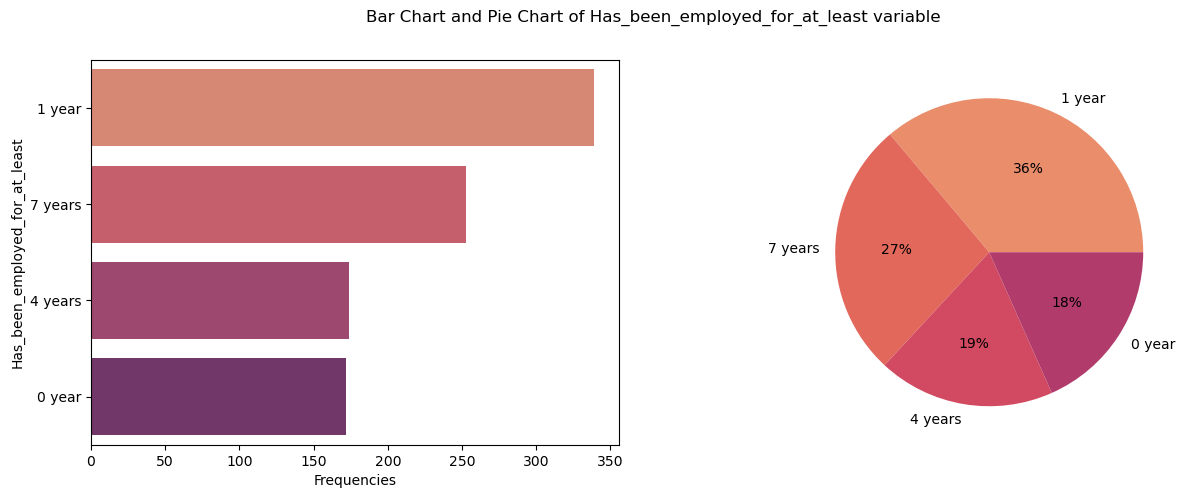

Frequency table of Has_been_employed_for_at_most variable: 


,Has_been_employed_for_at_most,Frequencies,% Percentages
0,4 years,339,45.38
1,7 years,174,23.29
2,1 year,172,23.03
3,0 year,62,8.30


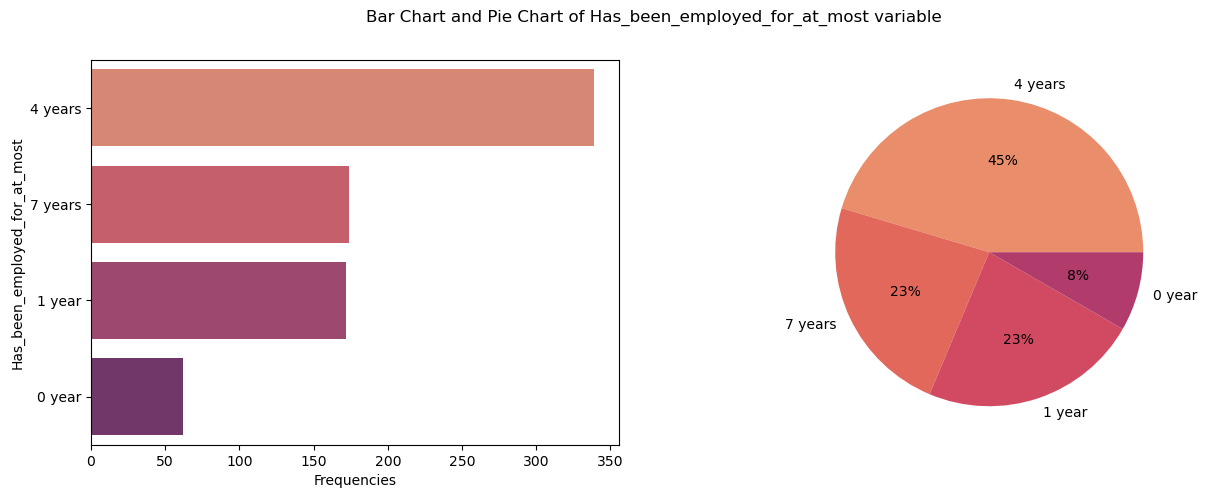

Frequency table of Telephone variable: 


,Telephone,Frequencies,% Percentages
0,Registered under the applicant's name,404,100.0


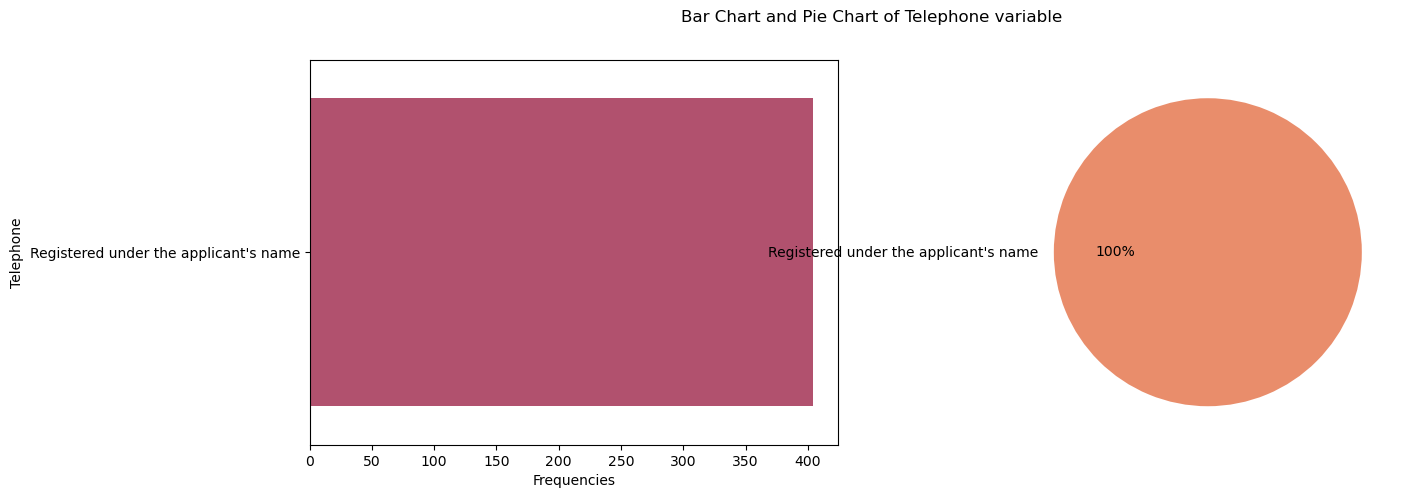

Frequency table of Savings_account_balance variable: 


,Savings_account_balance,Frequencies,% Percentages
0,Low,603,73.81
1,Medium,103,12.61
2,High,63,7.71
3,Very high,48,5.88


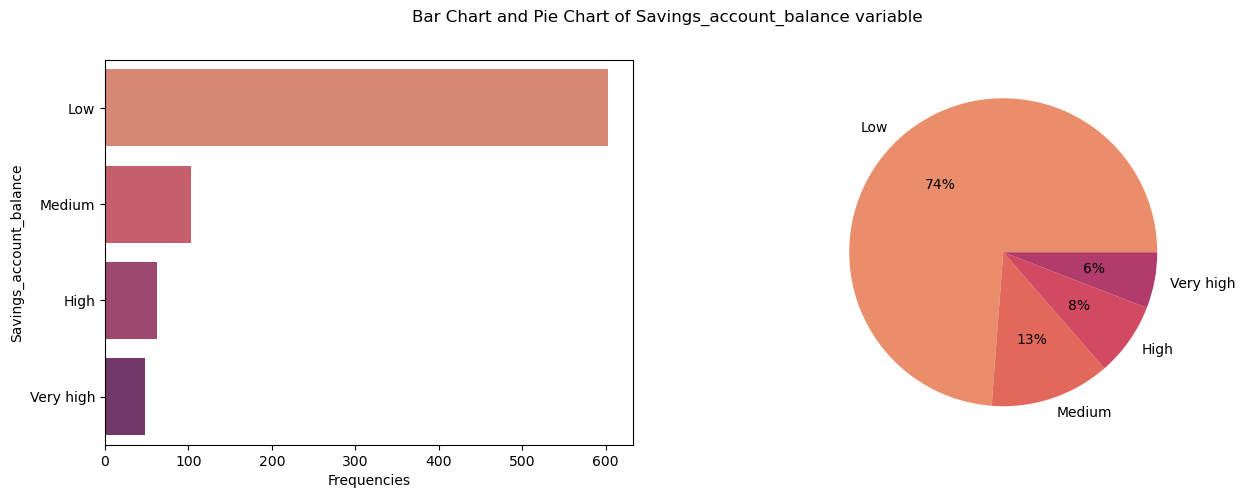

Frequency table of Balance_in_existing_bank_account_(lower_limit_of_bucket) variable: 


,Balance_in_existing_bank_account_(lower_limit_of_bucket),Frequencies,% Percentages
0,0,269,81.02
1,2 lac,63,18.98


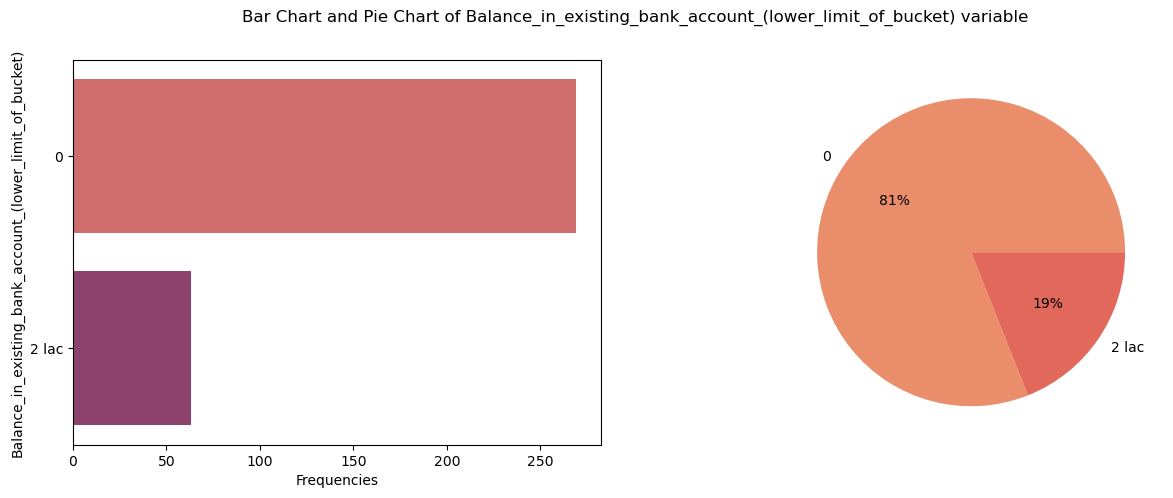

Frequency table of Balance_in_existing_bank_account_(upper_limit_of_bucket) variable: 


,Balance_in_existing_bank_account_(upper_limit_of_bucket),Frequencies,% Percentages
0,0,274,50.46
1,2 lac,269,49.54


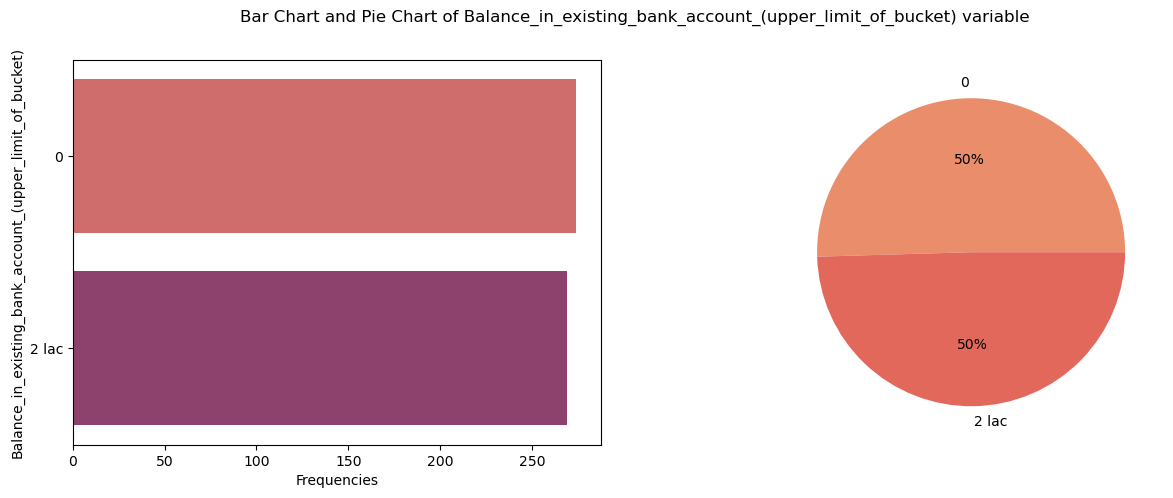

In [92]:
for i in range(1,len(categorical)):
    descriptive_summary_c(categorical[i])

<b>Observation:</b>
<br> 
1. Purpose of loan for electronic equipment is 28.34% and new vehicle is 23.68% which constitutes more than 50%
2. No of people who are
- critical/pending loans at other banks are 29.3% 
- delay in paying off loans in the past are 8.8%
3. 71.3% have their own house
4. 77.8% are skilled/employed/qualified/officials and rest are unemployed/unskilled
5. 73.8% have low Savings_account_balance

<b>Target variable

In [93]:
merged_data['high_risk_applicant'].describe()

count    1000.000000
mean        0.300000
std         0.458487
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: high_risk_applicant, dtype: float64

In [94]:
merged_data.high_risk_applicant.value_counts() / len(merged_data) * 100

0    70.0
1    30.0
Name: high_risk_applicant, dtype: float64

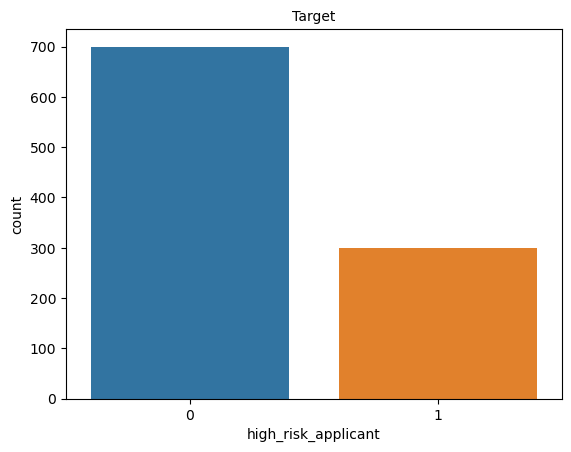

In [37]:
sns.countplot(merged_data["high_risk_applicant"])
plt.title("Target",fontsize=10)
plt.show()

<b>Observation:</b>
This dataset is slightly imbalanced with 30-70 split

 <b>numerical vs target variavble

In [38]:
def des_sum_graph(column):
    fig, axs = plt.subplots(1,2,figsize=(19,6))
    x = merged_data[merged_data['high_risk_applicant']==0][column]
    y = merged_data[merged_data['high_risk_applicant']==1][column]
    axs[0].hist(x, alpha=0.5, label='Not Default') #creating histogram when high_risk_applicant is Default
    axs[0].hist(y, alpha=0.5, label='Default') #creating histogram when high_risk_applicant is Not Default
    axs[0].legend(loc='upper right')
    sns.boxplot(data=merged_data, x='high_risk_applicant', y=column, ax=axs[1]) #Boxplot to look quantitive merged_data distribution when high_risk_applicant default or not default
    fig.suptitle(f"Histogram and Boxplot of {column} variable according to high_risk_applicant variable", fontweight="bold")
    plt.show()
    print(f"\033[1mDescriptive summary of {column} variable when high_risk_applicant is Not Default: \033[0m")
    print(f"{merged_data[merged_data['high_risk_applicant']==0][column].describe().round(3)}")
    print(f"Range: {merged_data[merged_data['high_risk_applicant']==0][column].max() - merged_data[merged_data['high_risk_applicant']==0][column].min()}")
    print(f"Interquartile Range: {merged_data[merged_data['high_risk_applicant']==0][column].describe()[6] - merged_data[merged_data['high_risk_applicant']==0][column].describe()[4]}\n")
    print(f"Skewness: {skew(merged_data[(merged_data['high_risk_applicant']==0)&(merged_data[column].isna()==False)][column], bias=True)}")
    print(f"Kurtosis: {kurtosis(merged_data[(merged_data['high_risk_applicant']==0)&(merged_data[column].isna()==False)][column], bias=True)}\n")

    print(f"\033[1mDescriptive summary of {column} variable when high_risk_applicant is Default: \033[0m")
    print(f"{merged_data[merged_data['high_risk_applicant']==1][column].describe().round(3)}")
    print(f"Range: {merged_data[merged_data['high_risk_applicant']==1][column].max() - merged_data[merged_data['high_risk_applicant']==1][column].min()}")
    print(f"Interquartile Range: {merged_data[merged_data['high_risk_applicant']==1][column].describe()[6] - merged_data[merged_data['high_risk_applicant']==1][column].describe()[4]}\n")
    print(f"Skewness: {skew(merged_data[(merged_data['high_risk_applicant']==1)&(merged_data[column].isna()==False)][column], bias=True)}")
    print(f"Kurtosis: {kurtosis(merged_data[(merged_data['high_risk_applicant']==1)&(merged_data[column].isna()==False)][column], bias=True)}")

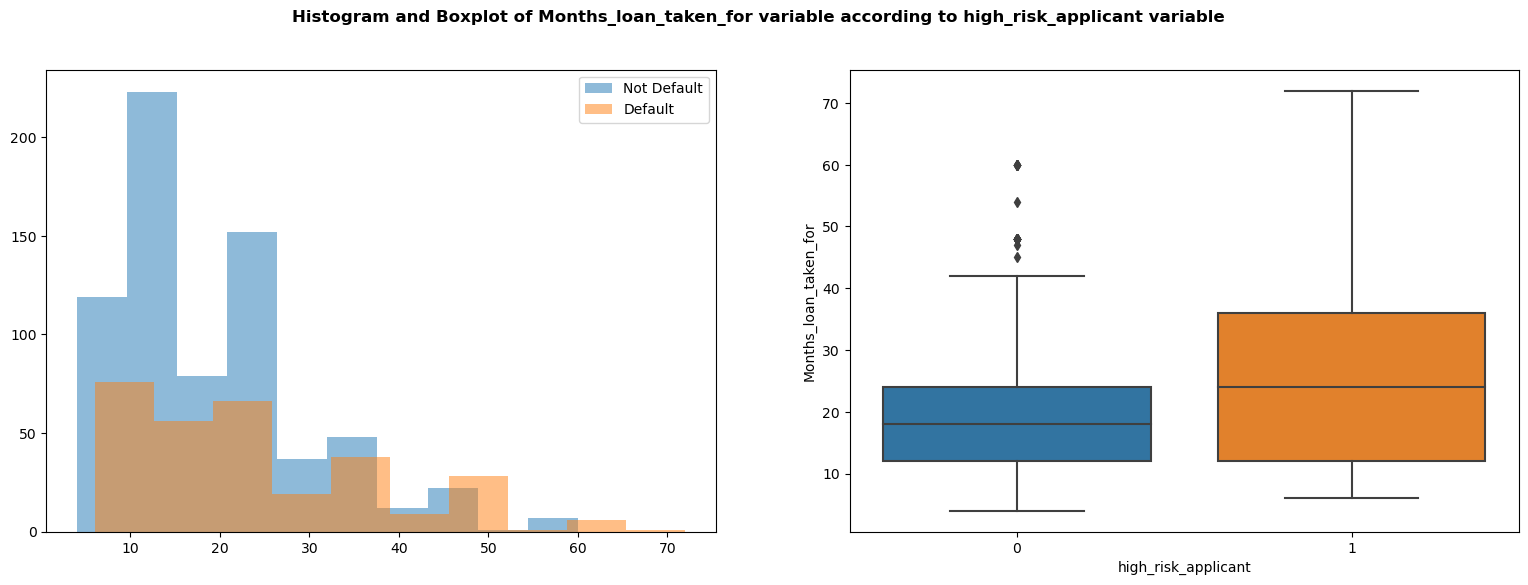

Descriptive summary of Months_loan_taken_for variable when high_risk_applicant is Not Default: 
count    700.000
mean      19.207
std       11.080
min        4.000
25%       12.000
50%       18.000
75%       24.000
max       60.000
Name: Months_loan_taken_for, dtype: float64
Range: 56
Interquartile Range: 12.0

Skewness: 1.1857335556408055
Kurtosis: 1.3891577117807818

Descriptive summary of Months_loan_taken_for variable when high_risk_applicant is Default: 
count    300.000
mean      24.860
std       13.283
min        6.000
25%       12.000
50%       24.000
75%       36.000
max       72.000
Name: Months_loan_taken_for, dtype: float64
Range: 66
Interquartile Range: 24.0

Skewness: 0.8314499958331072
Kurtosis: 0.0454841448647918


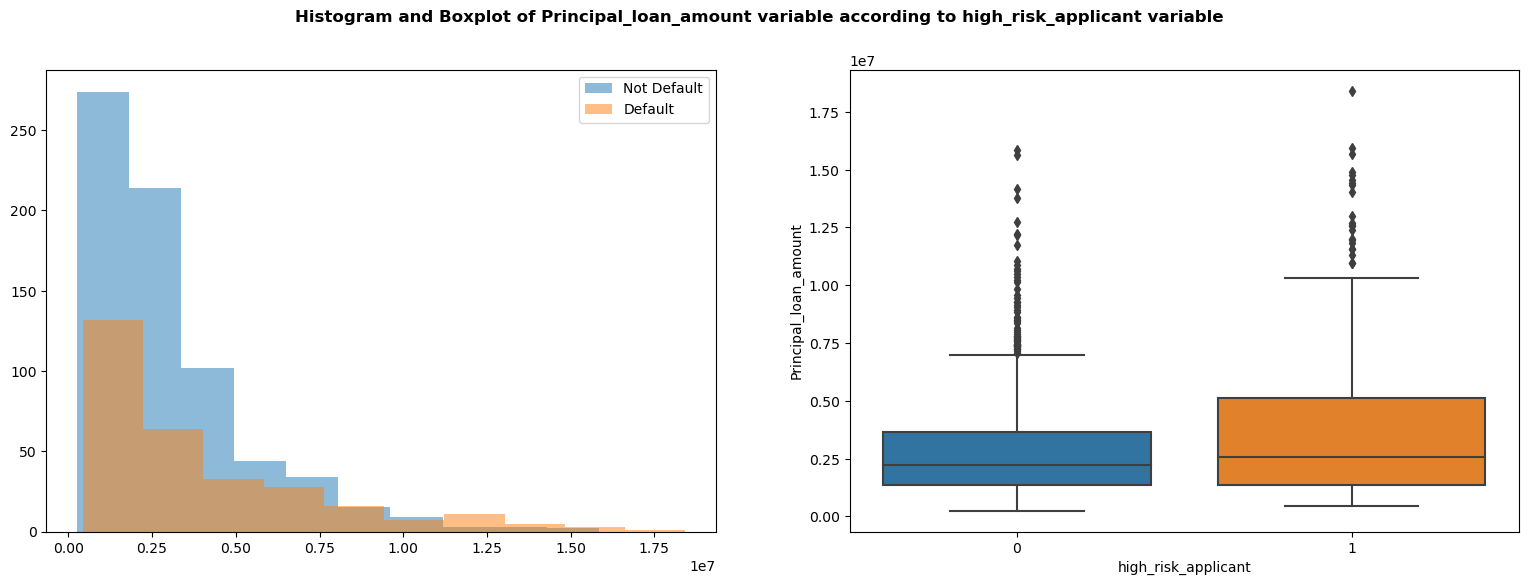

Descriptive summary of Principal_loan_amount variable when high_risk_applicant is Not Default: 
count    7.000000e+02
mean     2.985457e+06
std      2.401472e+06
min      2.500000e+05
25%      1.375500e+06
50%      2.244000e+06
75%      3.634750e+06
max      1.585700e+07
Name: Principal_loan_amount, dtype: float64
Range: 15607000
Interquartile Range: 2259250.0

Skewness: 1.9461844404144868
Kurtosis: 4.643786507049743

Descriptive summary of Principal_loan_amount variable when high_risk_applicant is Default: 
count    3.000000e+02
mean     3.938127e+06
std      3.535819e+06
min      4.330000e+05
25%      1.352500e+06
50%      2.574500e+06
75%      5.141500e+06
max      1.842400e+07
Name: Principal_loan_amount, dtype: float64
Range: 17991000
Interquartile Range: 3789000.0

Skewness: 1.5760271708701705
Kurtosis: 2.0861899082287056


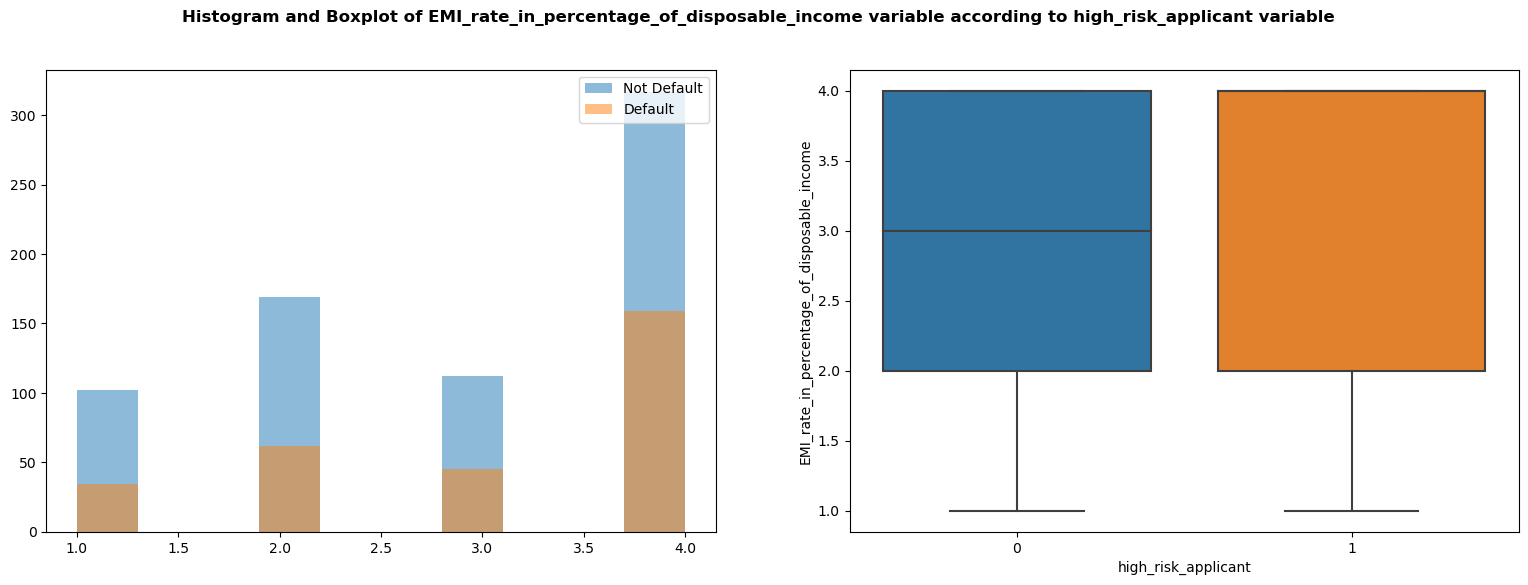

Descriptive summary of EMI_rate_in_percentage_of_disposable_income variable when high_risk_applicant is Not Default: 
count    700.000
mean       2.920
std        1.128
min        1.000
25%        2.000
50%        3.000
75%        4.000
max        4.000
Name: EMI_rate_in_percentage_of_disposable_income, dtype: float64
Range: 3
Interquartile Range: 2.0

Skewness: -0.4529197567042006
Kurtosis: -1.285060777996106

Descriptive summary of EMI_rate_in_percentage_of_disposable_income variable when high_risk_applicant is Default: 
count    300.000
mean       3.097
std        1.088
min        1.000
25%        2.000
50%        4.000
75%        4.000
max        4.000
Name: EMI_rate_in_percentage_of_disposable_income, dtype: float64
Range: 3
Interquartile Range: 2.0

Skewness: -0.722303977605875
Kurtosis: -0.9611765510192614


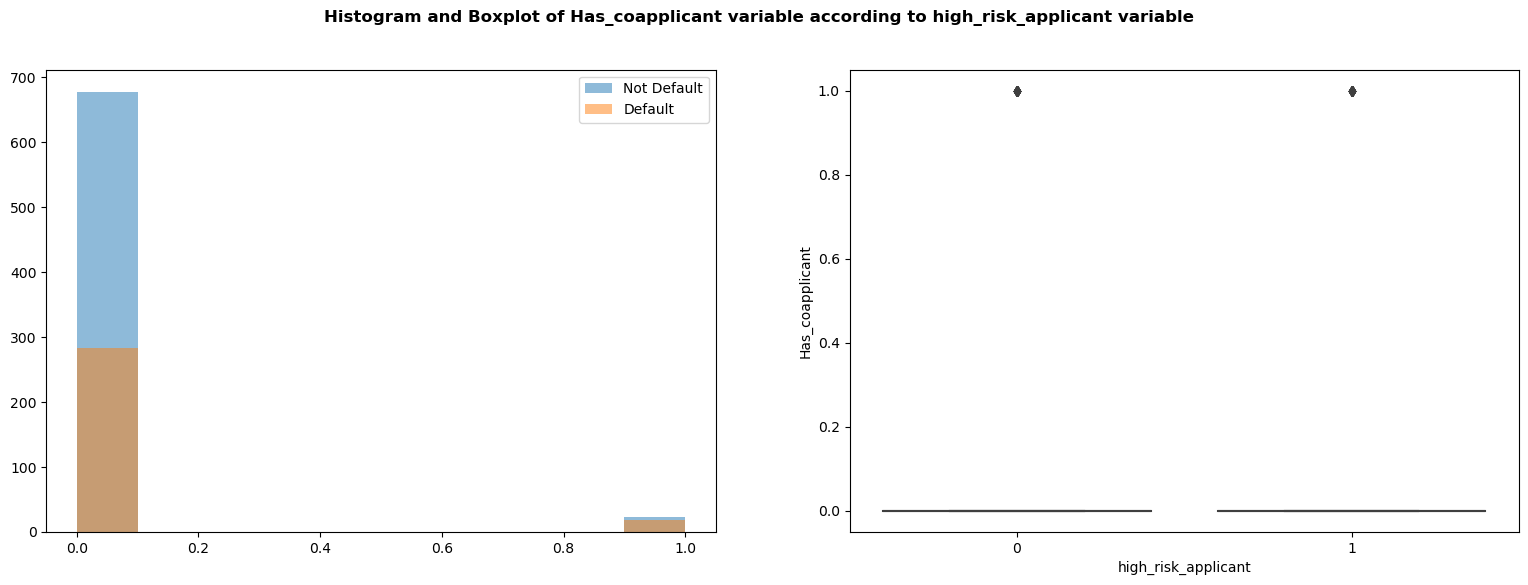

Descriptive summary of Has_coapplicant variable when high_risk_applicant is Not Default: 
count    700.000
mean       0.033
std        0.178
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        1.000
Name: Has_coapplicant, dtype: float64
Range: 1
Interquartile Range: 0.0

Skewness: 5.241064397697085
Kurtosis: 25.468756020807902

Descriptive summary of Has_coapplicant variable when high_risk_applicant is Default: 
count    300.000
mean       0.060
std        0.238
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        1.000
Name: Has_coapplicant, dtype: float64
Range: 1
Interquartile Range: 0.0

Skewness: 3.7054684526926827
Kurtosis: 11.730496453900704


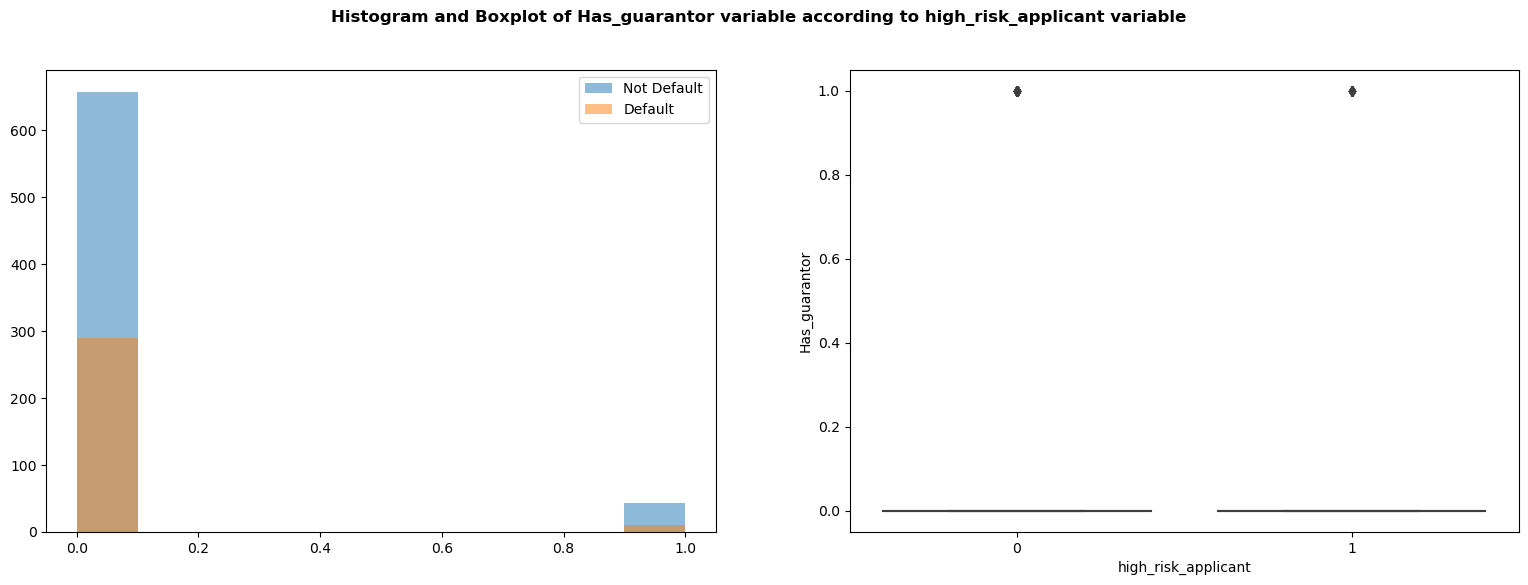

Descriptive summary of Has_guarantor variable when high_risk_applicant is Not Default: 
count    700.000
mean       0.060
std        0.238
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        1.000
Name: Has_guarantor, dtype: float64
Range: 1
Interquartile Range: 0.0

Skewness: 3.7054684526926813
Kurtosis: 11.7304964539007

Descriptive summary of Has_guarantor variable when high_risk_applicant is Default: 
count    300.000
mean       0.033
std        0.180
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        1.000
Name: Has_guarantor, dtype: float64
Range: 1
Interquartile Range: 0.0

Skewness: 5.199469468957454
Kurtosis: 25.0344827586207


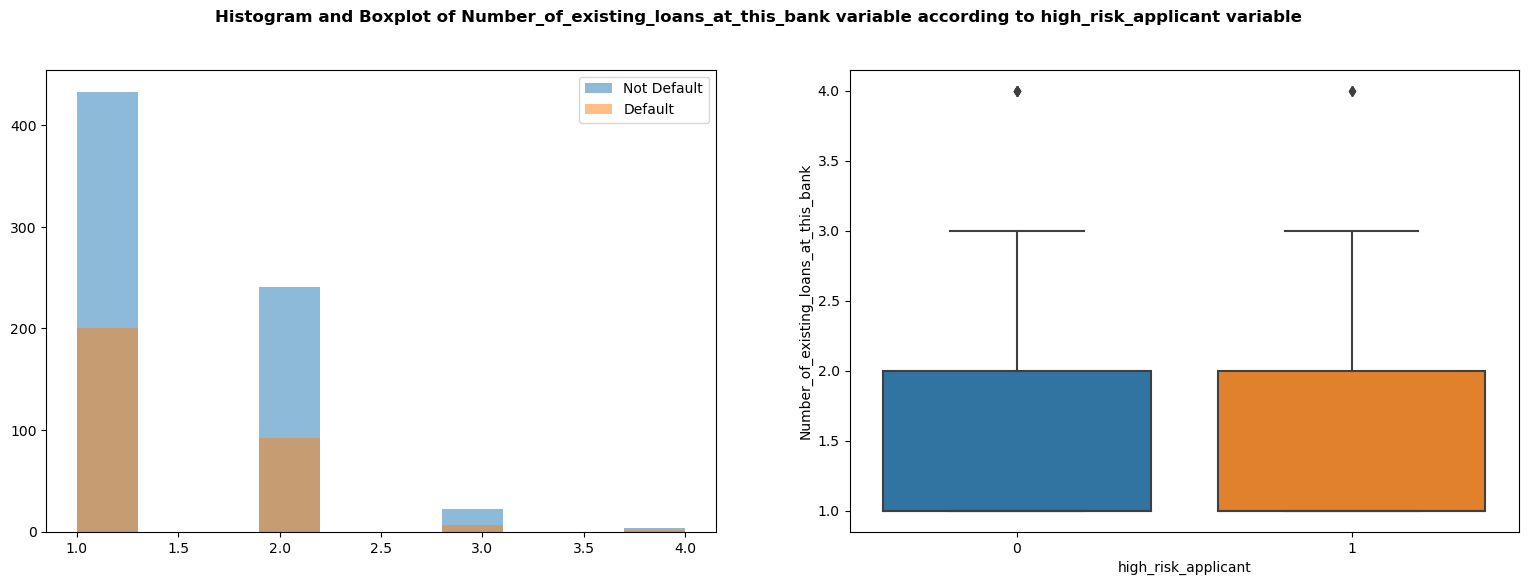

Descriptive summary of Number_of_existing_loans_at_this_bank variable when high_risk_applicant is Not Default: 
count    700.000
mean       1.424
std        0.585
min        1.000
25%        1.000
50%        1.000
75%        2.000
max        4.000
Name: Number_of_existing_loans_at_this_bank, dtype: float64
Range: 3
Interquartile Range: 1.0

Skewness: 1.1983451595352235
Kurtosis: 1.3163978796156108

Descriptive summary of Number_of_existing_loans_at_this_bank variable when high_risk_applicant is Default: 
count    300.000
mean       1.367
std        0.560
min        1.000
25%        1.000
50%        1.000
75%        2.000
max        4.000
Name: Number_of_existing_loans_at_this_bank, dtype: float64
Range: 3
Interquartile Range: 1.0

Skewness: 1.455497048355908
Kurtosis: 2.3784653183217


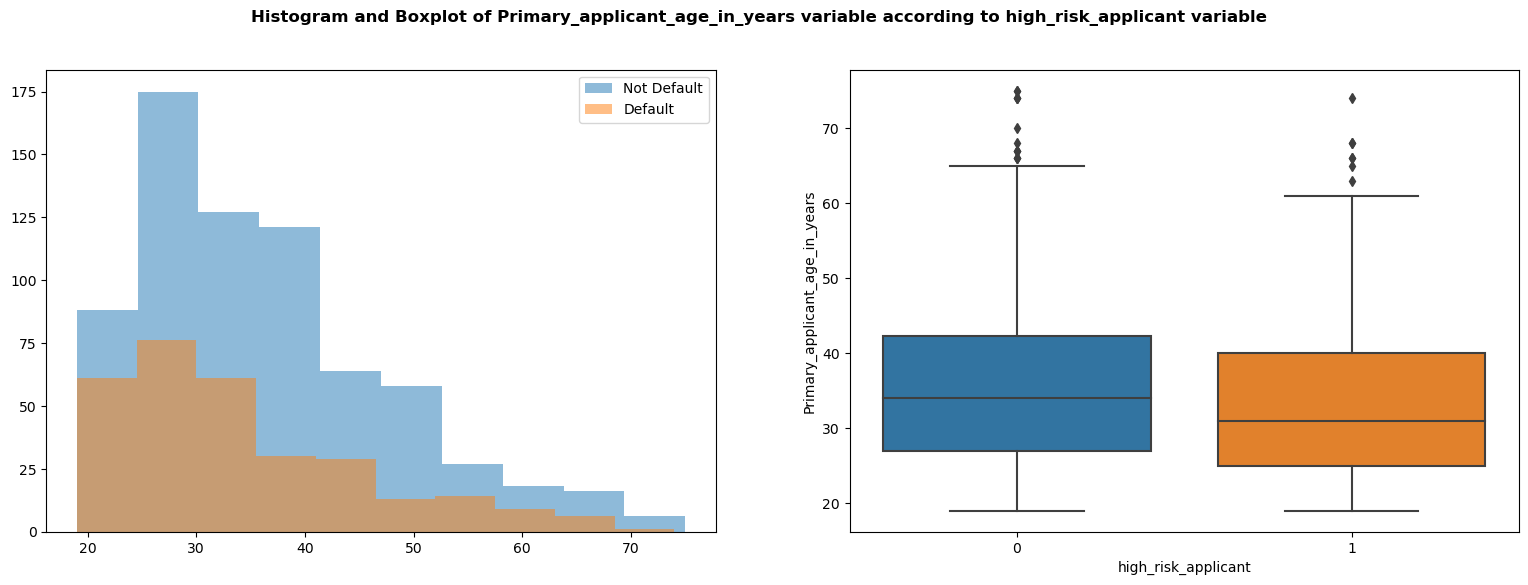

Descriptive summary of Primary_applicant_age_in_years variable when high_risk_applicant is Not Default: 
count    700.000
mean      36.224
std       11.381
min       19.000
25%       27.000
50%       34.000
75%       42.250
max       75.000
Name: Primary_applicant_age_in_years, dtype: float64
Range: 56
Interquartile Range: 15.25

Skewness: 0.9795020133875857
Kurtosis: 0.5614332001757565

Descriptive summary of Primary_applicant_age_in_years variable when high_risk_applicant is Default: 
count    300.000
mean      33.963
std       11.222
min       19.000
25%       25.000
50%       31.000
75%       40.000
max       74.000
Name: Primary_applicant_age_in_years, dtype: float64
Range: 55
Interquartile Range: 15.0

Skewness: 1.1494022048204522
Kurtosis: 0.7545804183644131


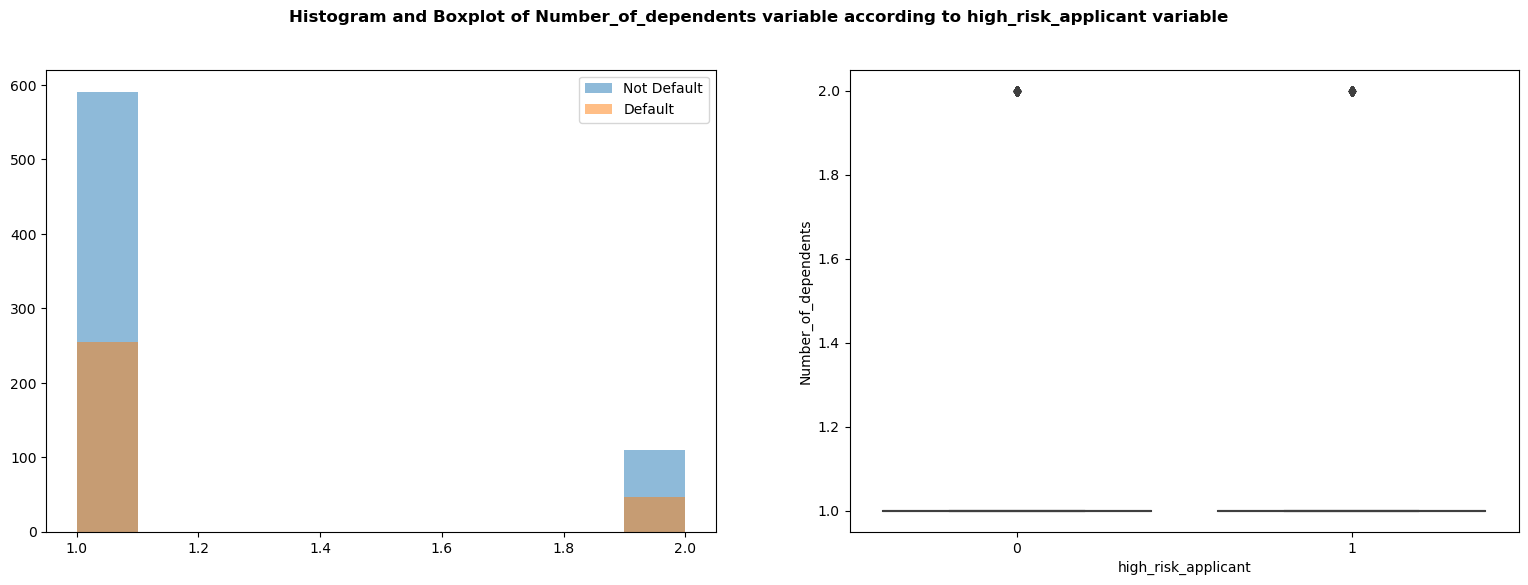

Descriptive summary of Number_of_dependents variable when high_risk_applicant is Not Default: 
count    700.000
mean       1.156
std        0.363
min        1.000
25%        1.000
50%        1.000
75%        1.000
max        2.000
Name: Number_of_dependents, dtype: float64
Range: 1
Interquartile Range: 0.0

Skewness: 1.8990659579784086
Kurtosis: 1.606451512752452

Descriptive summary of Number_of_dependents variable when high_risk_applicant is Default: 
count    300.000
mean       1.153
std        0.361
min        1.000
25%        1.000
50%        1.000
75%        1.000
max        2.000
Name: Number_of_dependents, dtype: float64
Range: 1
Interquartile Range: 0.0

Skewness: 1.9242768752545731
Kurtosis: 1.7028414926395046


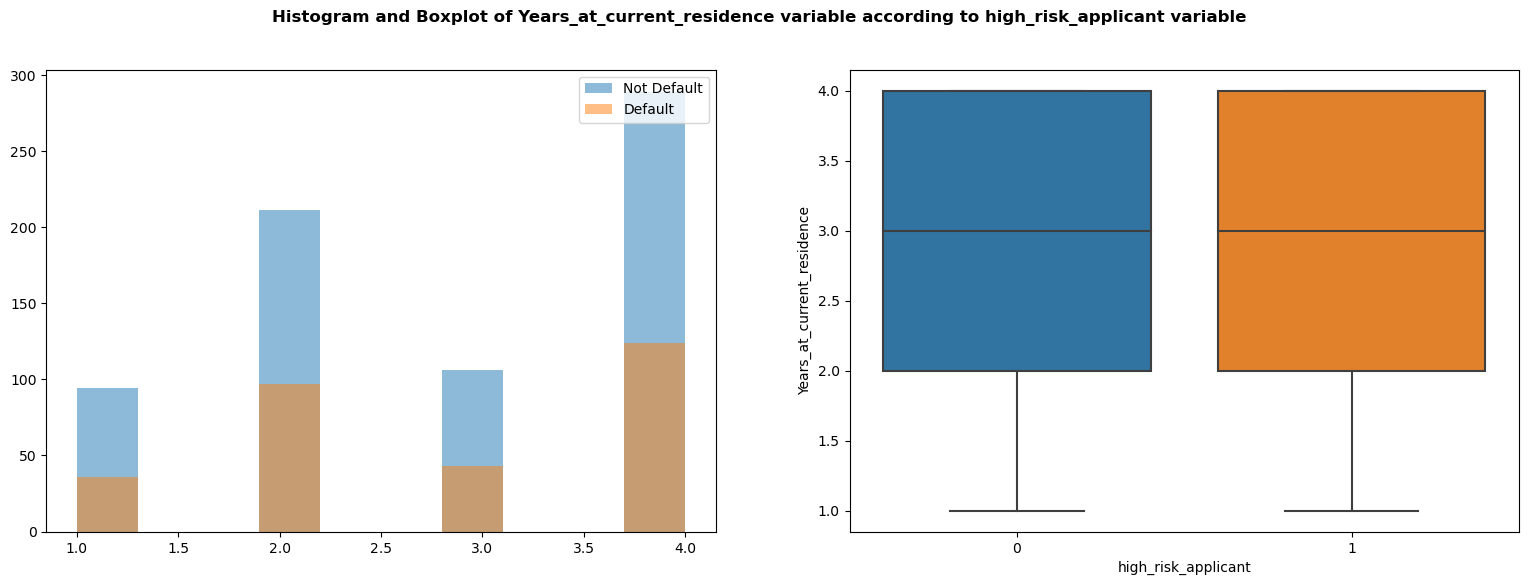

Descriptive summary of Years_at_current_residence variable when high_risk_applicant is Not Default: 
count    700.000
mean       2.843
std        1.108
min        1.000
25%        2.000
50%        3.000
75%        4.000
max        4.000
Name: Years_at_current_residence, dtype: float64
Range: 3
Interquartile Range: 2.0

Skewness: -0.280162502094975
Kurtosis: -1.3777960612940487

Descriptive summary of Years_at_current_residence variable when high_risk_applicant is Default: 
count    300.000
mean       2.850
std        1.095
min        1.000
25%        2.000
50%        3.000
75%        4.000
max        4.000
Name: Years_at_current_residence, dtype: float64
Range: 3
Interquartile Range: 2.0

Skewness: -0.2523064581800852
Kurtosis: -1.3889599603406686


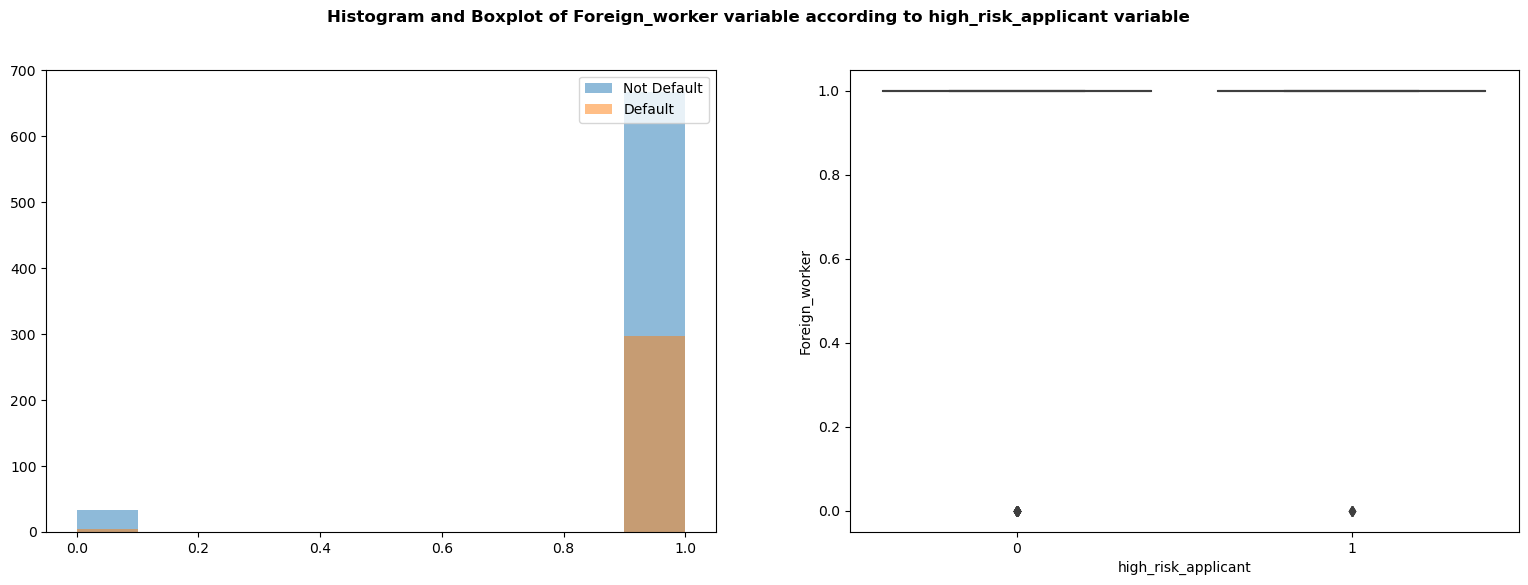

Descriptive summary of Foreign_worker variable when high_risk_applicant is Not Default: 
count    700.000
mean       0.953
std        0.212
min        0.000
25%        1.000
50%        1.000
75%        1.000
max        1.000
Name: Foreign_worker, dtype: float64
Range: 1
Interquartile Range: 0.0

Skewness: -4.2733589217956
Kurtosis: 16.261596474490034

Descriptive summary of Foreign_worker variable when high_risk_applicant is Default: 
count    300.000
mean       0.987
std        0.115
min        0.000
25%        1.000
50%        1.000
75%        1.000
max        1.000
Name: Foreign_worker, dtype: float64
Range: 1
Interquartile Range: 0.0

Skewness: -8.486077628298805
Kurtosis: 70.01351351351344


In [39]:
for i in range(1,len(numerical)-1):
    des_sum_graph(numerical[i])

<b>Observation:</b>
1. Months_loan_taken_for , Principal_loan_amount:
- All the descriptive variables(mean,25,50,75th,std_deviation) for applicants who defaulted is found to be heigher than non defaulted ( things to be noted: since the size of non defaulted size is less diffrence might not be statistically significant)
2. Primary applicants who defaulted have mean age of 33.97 and who did not defaulted have 36.24. This doesn't mean people with less age have more probabality of getting defaulted .
3. Years_at_current_residence did not have any difference on the target.
 

<b>categorical vs target  variable

In [46]:
def contigency_table(column):
    crosstable1 = pd.crosstab(merged_data[column],merged_data['high_risk_applicant']).reset_index()
    crosstable2 = pd.crosstab(merged_data[column],merged_data['high_risk_applicant']).apply(lambda r: round(r/r.sum()*100,2), axis=1).reset_index()
    crosstable = pd.merge(crosstable1, crosstable2, how='inner', on=column).set_index(column)
    crosstable.columns = ['Default', 'Not_Default', '%Default', '%Not_Default']
    return crosstable

In [50]:
def bar_graphs(data):
    N = data.shape[0]
    default_bar = list(data['%Default'])
    nondefault_bar = list(data['%Not_Default'])
    ind = np.arange(N)
    plt.figure(figsize=(15,5))
    width = 0.3       
    plt.bar(ind, default_bar , width, color='royalblue', label='% Default')
    plt.bar(ind + width, nondefault_bar, width, color='seagreen', label='% Not Default')
    plt.xlabel(f"{data.index.name}")
    plt.ylabel('Percentages')
    plt.title(f"Percentage Comparison of {data.index.name} variable")
    plt.xticks(ind + width / 2, list(data.index))
    plt.legend(loc='best')
    plt.show()

,Default,Not_Default,%Default,%Not_Default
Purpose,,,,
FF&E,123,58,67.96,32.04
business,63,34,64.95,35.05
career development,8,1,88.89,11.11
domestic appliances,8,4,66.67,33.33
education,28,22,56.00,44.00
electronic equipment,218,62,77.86,22.14
new vehicle,145,89,61.97,38.03
repair costs,14,8,63.64,36.36
used vehicle,86,17,83.50,16.50


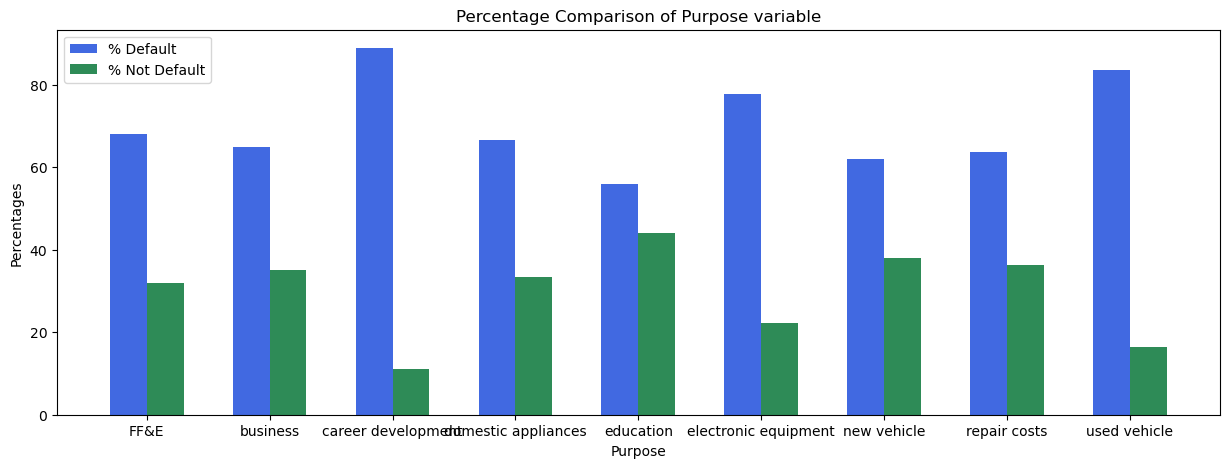

,Default,Not_Default,%Default,%Not_Default
Property,,,,
building society savings agreement/life insurance,161,71,69.40,30.60
car or other,230,102,69.28,30.72
real estate,222,60,78.72,21.28


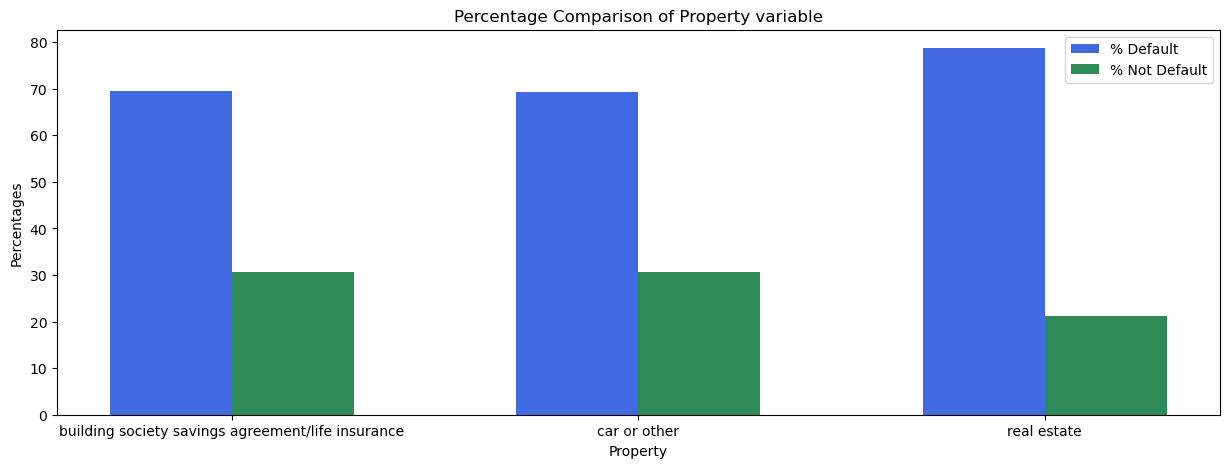

,Default,Not_Default,%Default,%Not_Default
Other_EMI_plans,,,,
bank,82,57,58.99,41.01
stores,28,19,59.57,40.43


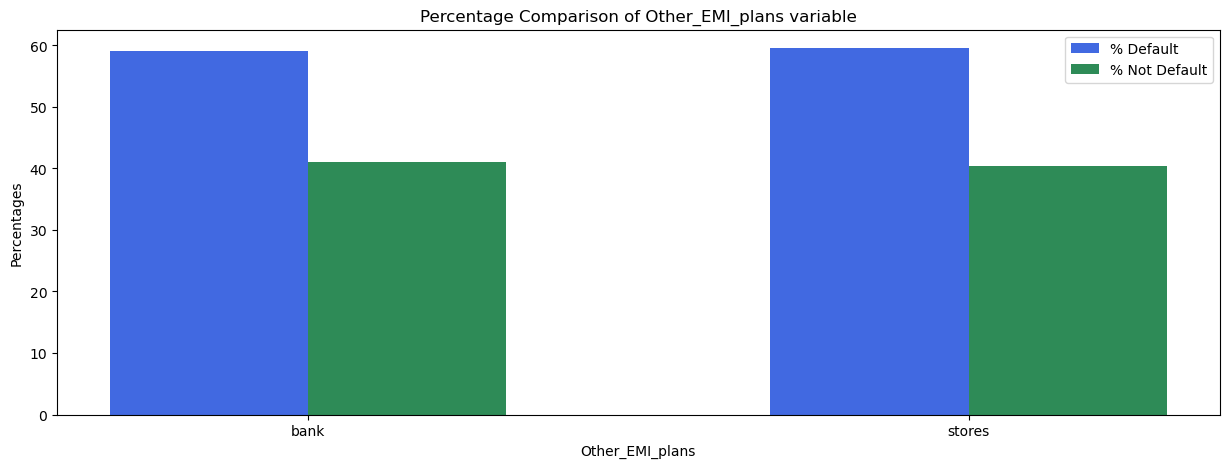

,Default,Not_Default,%Default,%Not_Default
Loan_history,,,,
all loans at this bank paid back duly,21,28,42.86,57.14
critical/pending loans at other banks,243,50,82.94,17.06
delay in paying off loans in the past,60,28,68.18,31.82
existing loans paid back duly till now,361,169,68.11,31.89
no loans taken/all loans paid back duly,15,25,37.50,62.50


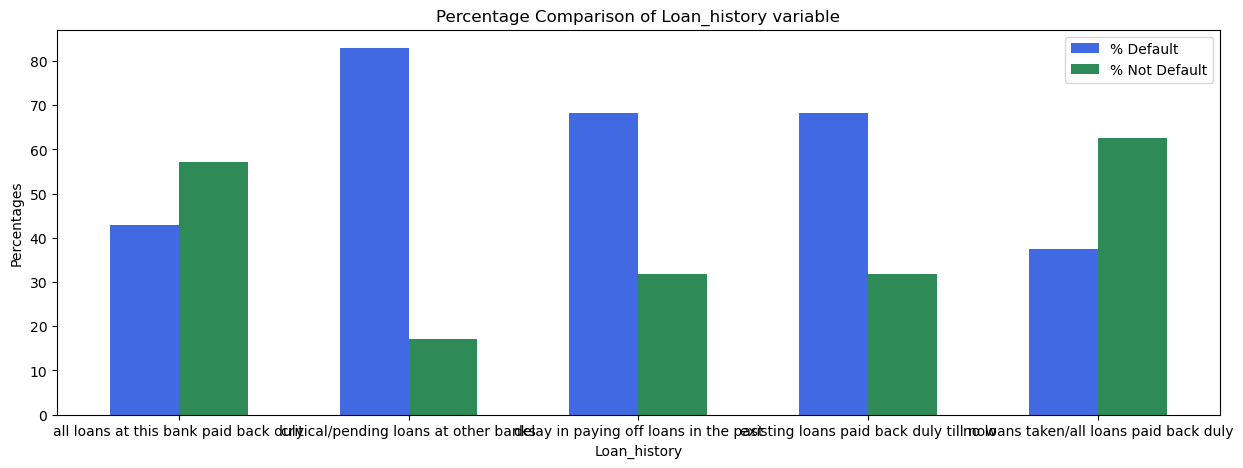

,Default,Not_Default,%Default,%Not_Default
Gender,,,,
female,201,109,64.84,35.16
male,499,191,72.32,27.68


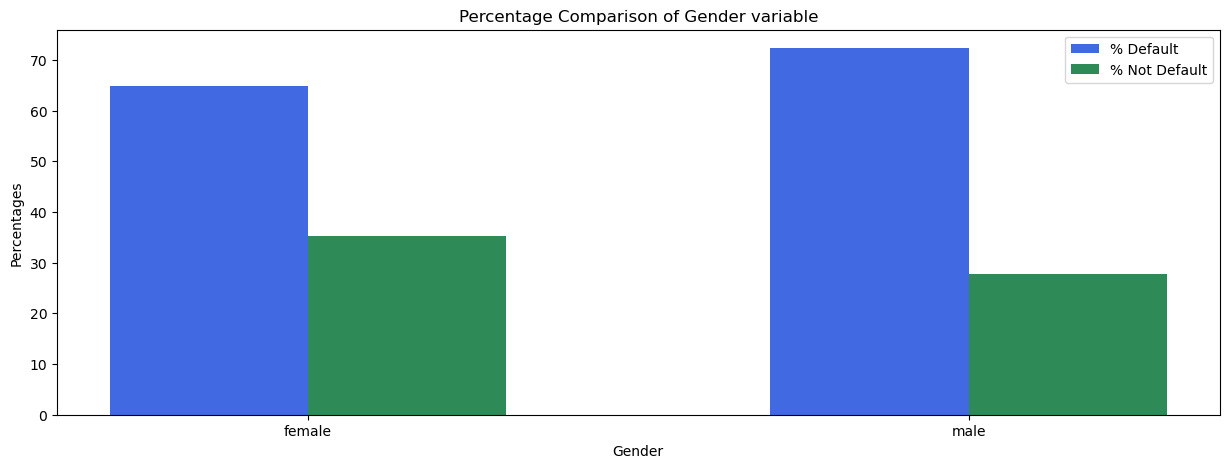

,Default,Not_Default,%Default,%Not_Default
Marital_status,,,,
divorced/separated,30,20,60.00,40.00
divorced/separated/married,201,109,64.84,35.16
married/widowed,67,25,72.83,27.17
single,402,146,73.36,26.64


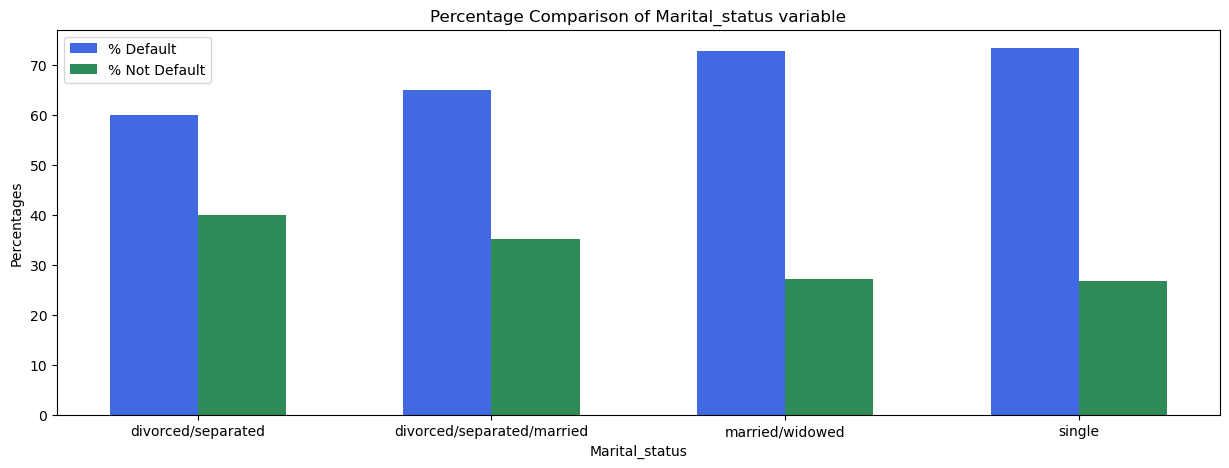

,Default,Not_Default,%Default,%Not_Default
Housing,,,,
for free,64,44,59.26,40.74
own,527,186,73.91,26.09
rent,109,70,60.89,39.11


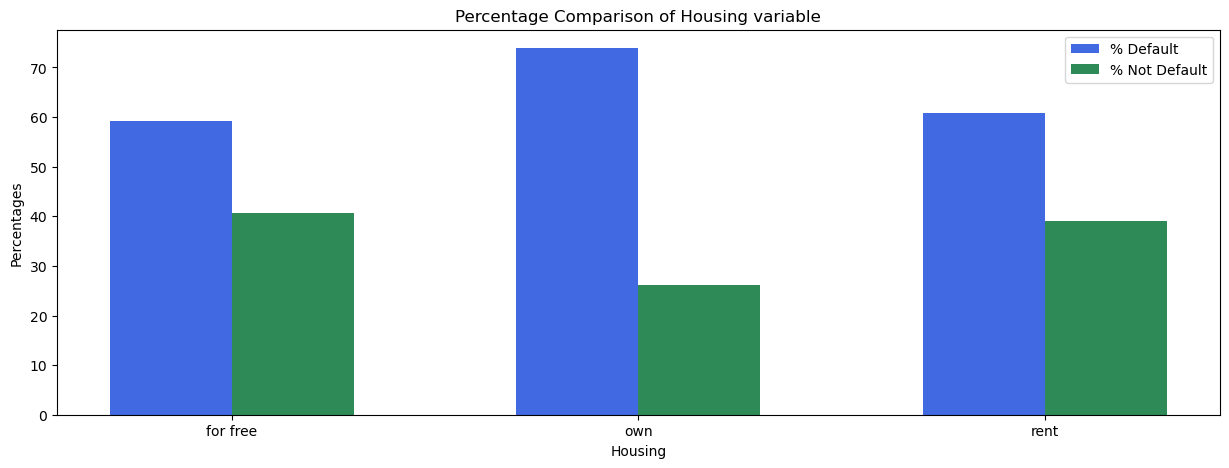

,Default,Not_Default,%Default,%Not_Default
Employment_status,,,,
management / self-employed / highly qualified employee / officer,97,51,65.54,34.46
skilled employee / official,444,186,70.48,29.52
unemployed / unskilled - non-resident,15,7,68.18,31.82
unskilled - resident,144,56,72.00,28.00


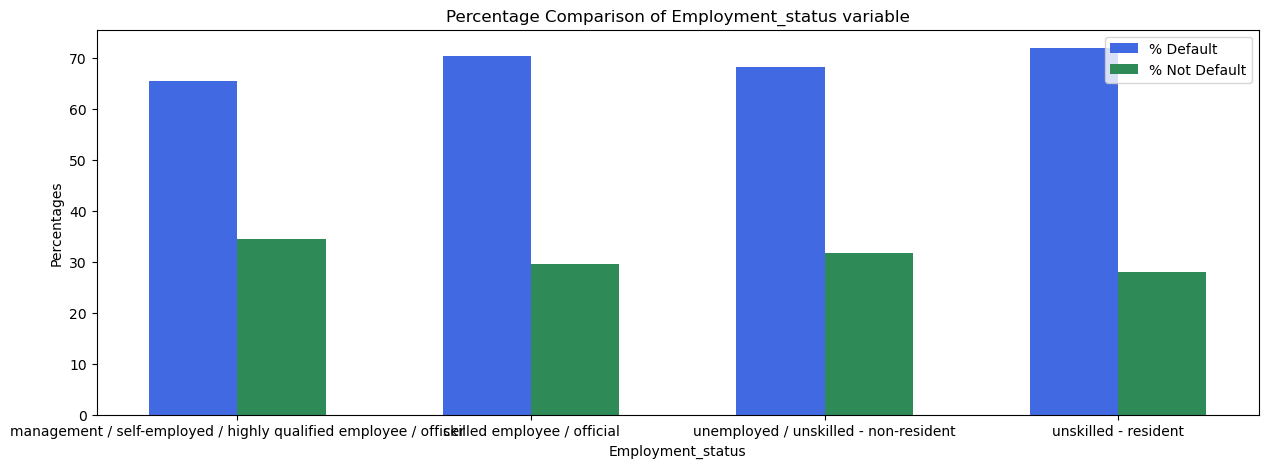

,Default,Not_Default,%Default,%Not_Default
Has_been_employed_for_at_least,,,,
0 year,102,70,59.30,40.70
1 year,235,104,69.32,30.68
4 years,135,39,77.59,22.41
7 years,189,64,74.70,25.30


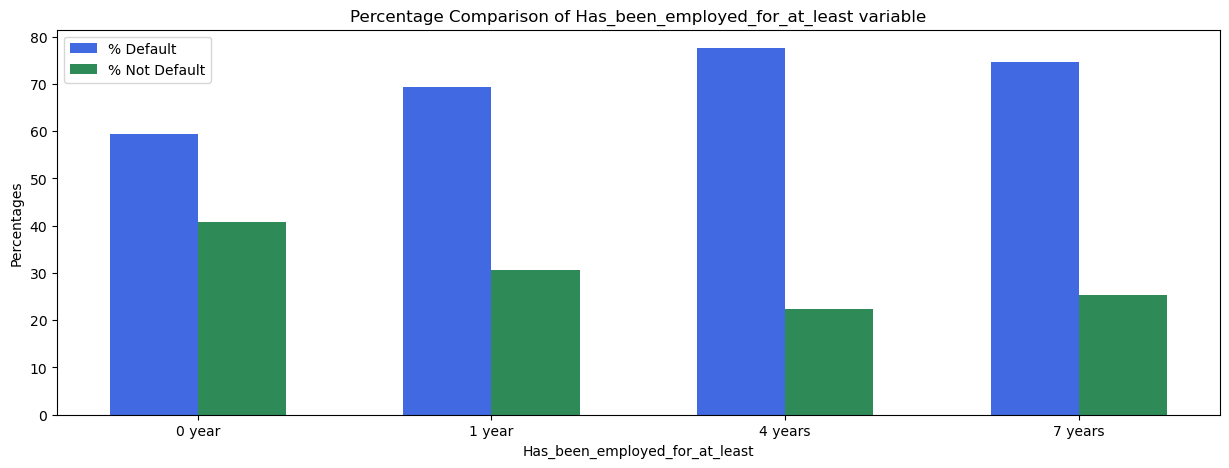

,Default,Not_Default,%Default,%Not_Default
Has_been_employed_for_at_most,,,,
0 year,39,23,62.90,37.10
1 year,102,70,59.30,40.70
4 years,235,104,69.32,30.68
7 years,135,39,77.59,22.41


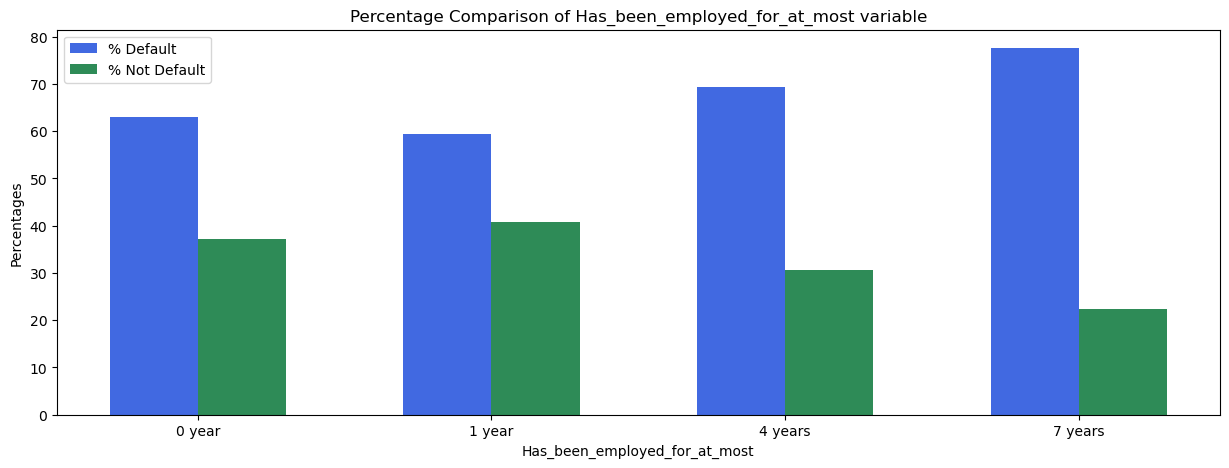

,Default,Not_Default,%Default,%Not_Default
Telephone,,,,
Registered under the applicant's name,291,113,72.03,27.97


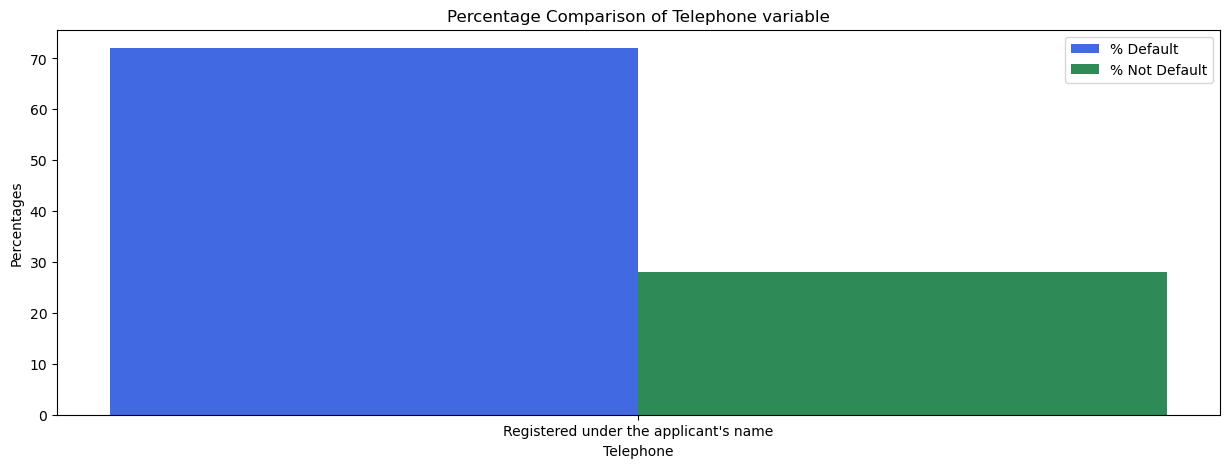

,Default,Not_Default,%Default,%Not_Default
Savings_account_balance,,,,
High,52,11,82.54,17.46
Low,386,217,64.01,35.99
Medium,69,34,66.99,33.01
Very high,42,6,87.50,12.50


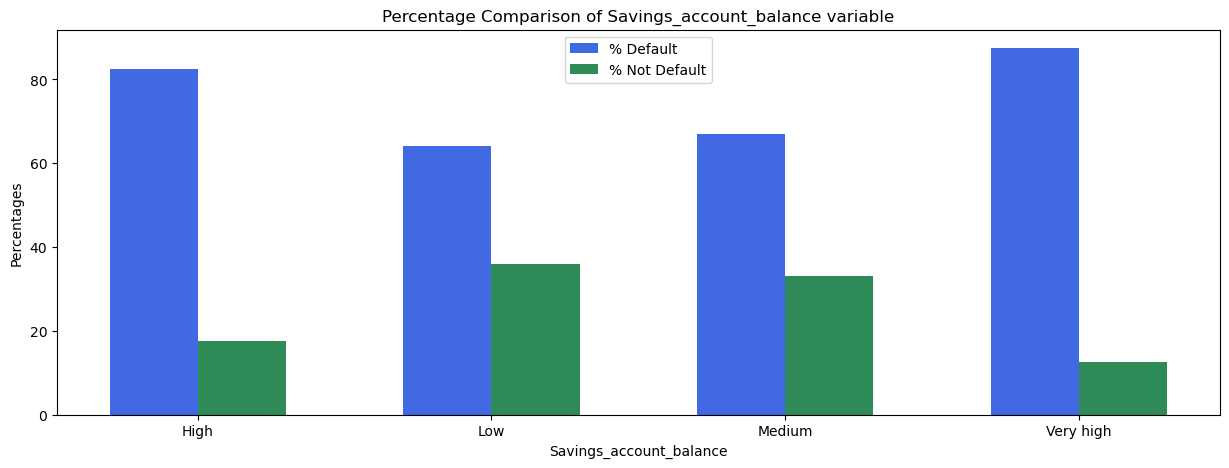

,Default,Not_Default,%Default,%Not_Default
Balance_in_existing_bank_account_(lower_limit_of_bucket),,,,
0,164,105,60.97,39.03
2 lac,49,14,77.78,22.22


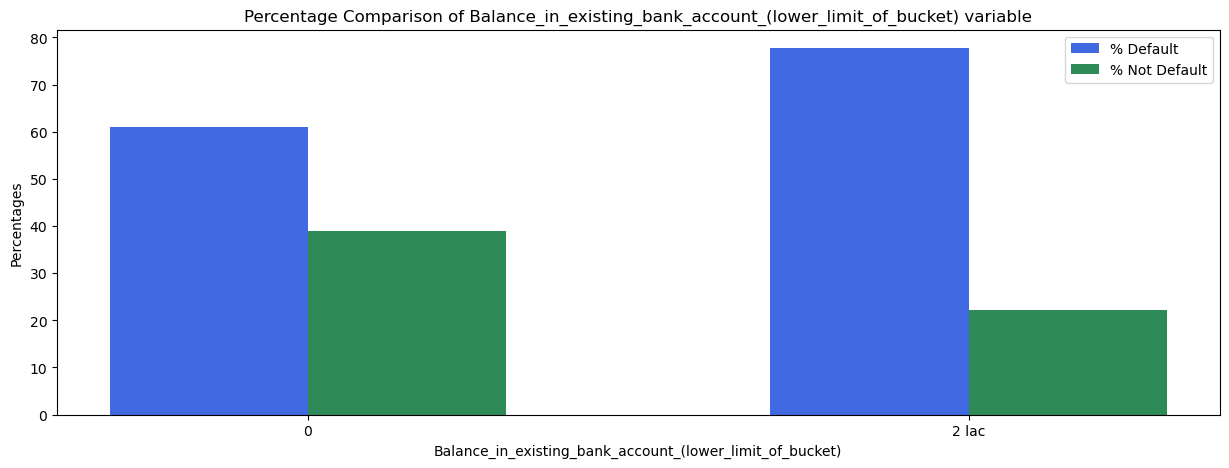

In [51]:
for i in range(1,len(categorical)-1):
    display(contigency_table(categorical[i]))
    bar_graphs(contigency_table(categorical[i]))

<b>Observation:</b>
1. People who bought loan for career development have heigher chance of default that is 88.9%
2. People who have real estate have default rate of 78.72% 
3. People who have critical/pending loans at other banks have default rate of 82.94%
4. skilled employee / official & unskilled - resident have defalt rate of 70.48% and 72% respectevily
3. People with high saving bank account balance have heigher chance of default i.e 82.54%
4. People who as employed for atleast 4 years and 7 years have default rate of 77.6% and 74.7% which higher compared to 0 and 4 years.

<b>Pearson correlation between categorical and numerical variables

In [57]:
label = preprocessing.LabelEncoder() 
data_encoded = pd.DataFrame() 

for i in merged_data[categorical].columns :
    data_encoded[i]=label.fit_transform(merged_data[i]) #converting categorical data into integer format with LabelEncoder()

In [58]:
rows = {}
for var1 in merged_data[numerical].columns:
    values = [] 
    for var2 in data_encoded.columns:
        corr= merged_data[var1].corr(data_encoded[var2])
        values.append(corr)
    rows[var1] = values


In [59]:
df = pd.DataFrame(rows, index=data_encoded.columns)
df

,applicant_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,high_risk_applicant
loan_application_id,0.010449,0.030788,0.013488,0.010076,0.018230,-0.004197,0.022838,-0.010096,0.026662,0.023697,0.018177,0.034606
Purpose,-0.055080,0.029549,0.100500,0.007208,-0.011114,0.041298,0.034992,0.129643,0.100073,0.072816,-0.053767,-0.045222
Property,-0.028683,0.068363,0.081618,0.025613,0.057046,0.006228,-0.001222,0.166124,0.067663,0.107311,0.006595,0.034011
Other_EMI_plans,-0.045165,-0.054884,-0.046008,-0.000983,0.002324,-0.064502,-0.048442,-0.042346,-0.076891,0.002089,-0.015211,-0.109844
Loan_history,-0.000260,0.029430,0.029050,-0.059779,-0.018868,0.011062,-0.387820,-0.157261,-0.070008,-0.086987,0.000513,0.097054
Gender,0.028311,0.081432,0.093482,0.086302,0.007742,0.010907,0.094260,0.161694,0.203431,-0.013818,-0.051202,-0.075493
Marital_status,0.037413,0.093721,0.102481,0.138389,0.026430,0.016897,0.111867,0.147954,0.256475,0.041256,-0.046226,-0.095055
Housing,-0.058416,-0.157049,-0.135632,-0.089405,0.038835,0.053505,-0.048591,-0.301419,-0.114508,-0.011941,-0.063582,0.019315
Employment_status,-0.007027,-0.215438,-0.261139,-0.078090,-0.027902,0.079757,0.004544,-0.001637,0.127146,0.000450,-0.100028,-0.032756
Has_been_employed_for_at_least,0.002692,0.052672,0.078307,0.077465,0.035986,-0.052980,0.139616,0.369690,0.056364,0.283506,0.078197,-0.076891


<b>Observation:</b>
1. No strong correlation has been found 

<b>Corelation Between quantitive variables:

In [105]:
merged_data[numerical].corr(method='pearson')

,applicant_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,high_risk_applicant
applicant_id,1.000000,0.009359,-0.056669,0.002269,-0.012961,0.011860,-0.038409,-0.010583,0.017048,-0.028017,0.066389,-0.029125
Months_loan_taken_for,0.009359,1.000000,0.624984,0.074749,0.029698,-0.039594,-0.011284,-0.036136,-0.023834,0.034067,0.138196,0.214927
Principal_loan_amount,-0.056669,0.624984,1.000000,-0.271316,0.079076,-0.065237,0.020795,0.032716,0.017142,0.028926,0.050050,0.154739
EMI_rate_in_percentage_of_disposable_income,0.002269,0.074749,-0.271316,1.000000,-0.013048,-0.006429,0.021669,0.058266,-0.071207,0.049302,0.090024,0.072404
Has_coapplicant,-0.012961,0.029698,0.079076,-0.013048,1.000000,-0.048426,-0.006001,-0.018357,-0.032817,0.001623,-0.066338,0.062728
Has_guarantor,0.011860,-0.039594,-0.065237,-0.006429,-0.048426,1.000000,-0.024682,-0.023923,0.036589,-0.028334,-0.097256,-0.055039
Number_of_existing_loans_at_this_bank,-0.038409,-0.011284,0.020795,0.021669,-0.006001,-0.024682,1.000000,0.149254,0.109667,0.089625,0.009717,-0.045732
Primary_applicant_age_in_years,-0.010583,-0.036136,0.032716,0.058266,-0.018357,-0.023923,0.149254,1.000000,0.118201,0.266419,0.006151,-0.091127
Number_of_dependents,0.017048,-0.023834,0.017142,-0.071207,-0.032817,0.036589,0.109667,0.118201,1.000000,0.042643,-0.077071,-0.003015
Years_at_current_residence,-0.028017,0.034067,0.028926,0.049302,0.001623,-0.028334,0.089625,0.266419,0.042643,1.000000,0.054097,0.002967
